## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Index**

1. **Understanding Variables:** got to know about different features available in Dataset and some stats seen at first instance.
2. **Univariate, Bivariate, and multivariate analysis:** explored the individual features and multiple features. Tried to get some insights.
3. **Data Cleaning and Outlier treatment:** cleaned the data, filled NA values, removed some outliers, and replaced the values.
4. **Creating new features and further analysis:** Created some new features for deep analysis and to create better models.
5. **Correlation Heatmap**
6. **Conclusion**

# **Understanding Variables**

Airbnb is an online platform where anyone can book thier stays according to their requirements and if someone has a place for stays they can become hosts. They can list their home, rooms etc. on the Airbnb platform can earn extra income.
 
**In this dataset we have details about listings(spaces for hosting or properties for hosting). Let's understand our variables:**
 
**1. id:** This variable contains unique id for a unique listing.
 
**2. name:** This gives us a small introduction about a listing. For example: Cozy Clean Guest Room - Family Apt, Large Furnished Room Near B'way etc.
 
**3. host_id:** This variable contains id for a host who is the host of corresponding listing.
 
**4. host_name:** This gives us name of the host of corresponding listing in the same row.
 
 A host_id and a host_name can come multiple times in their columns as their    may be multiple listings for a single host.
 
**5. neighbourhood_group:** New York City is composed of five boroughs: The Bronx, Brooklyn, Manhattan, Queens, and Staten Island. These boroughs are named here as neighbourhood_group.
 
**6. neighbourhood:** These are the areas in their corresponding neighbourhood_group.
 
**7. latitude:** Latitude of the listing.
 
**8. longitude:** longitude of the listing.
 
**9. room_type:** This variable tells us about the type of listings. There are three types of listings: 'Private room', 'Entire home/apt', 'Shared room'.
 
**10. price:** This is the price in dollars for one night stay.
 
**11. minimum_nights:** minimum nights, someone can book that listing for.
 
**12. number_of_reviews:** Total number of reviews for that listing.
 
**13. last_review:** This shows date of the latest review.
 
**14. reviews_per_month:** number of reviews per month for that listing.
 
**15. calculated_host_listings_count:** amount of listings listed per host
 
**16. availability_365:** number of days when listing is available for booking out of 365 days.

**We can change name of some columns:**

'id':'listing_id'

'name':'listing_details'

'minimum_nights':'minimum_nights_stay'

'last_review':'last_review_date'

'availability_365':'booking_availability'

In [ ]:
df.rename(columns={'id':'listing_id','name':'listing_details','minimum_nights':'minimum_nights_stay','last_review':'last_review_date','availability_365':'booking_availability'},inplace=True)

### Basics of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48895 non-null  int64  
 1   listing_details                 48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights_stay             48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review_date                

In [ ]:
df.describe()

listing_id  ...  booking_availability
count  4.889500e+04  ...          48895.000000
mean   1.901714e+07  ...            112.781327
std    1.098311e+07  ...            131.622289
min    2.539000e+03  ...              0.000000
25%    9.471945e+06  ...              0.000000
50%    1.967728e+07  ...             45.000000
75%    2.915218e+07  ...            227.000000
max    3.648724e+07  ...            365.000000

[8 rows x 10 columns]

In [ ]:
unique_host_count=len(df['host_name'].unique())
unique_Neighbourhoodgroup_count=len(df['neighbourhood_group'].unique())
unique_Neighbourhood_count=len(df['neighbourhood'].unique())
unique_roomtype_count=len(df['room_type'].unique())
print(f'unique host count {unique_host_count}')
print(f'unique neighbourhood group count {unique_Neighbourhoodgroup_count}')
print(f'unique neighbourhood count {unique_Neighbourhood_count}')
print(f'unique roomtype count {unique_roomtype_count}')

unique host count 11453
unique neighbourhood group count 5
unique neighbourhood count 221
unique roomtype count 3


**1. Number of rows are 48895**

**2. Number of colums are 16**

**3. There are four columns having atleast one null value.**

**4. Price can be considered as dependent variable.**

**5. Unique host count 11453**

**6. Unique neighbourhood group count 5**

**7. Unique neighbourhood count 221**

**8. Unique roomtype count 3**

**9. Price ranges between 0 to 10000 dollars**

**10. Minimum nights stay ranges between 1 to 1250 nights**

**11. Minimum and maximum number of reviews for a lisitng are 0 and 629 respectively**

**12. Minimum and maximum number of listings that a host have are 1 and 327 respectively.**

**13. Days available for booking throughout the year range 0 to 365 days.**


# **Univariate, Bivariate and multivariate analysis**

## Analysis on price column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of total rows: 48895


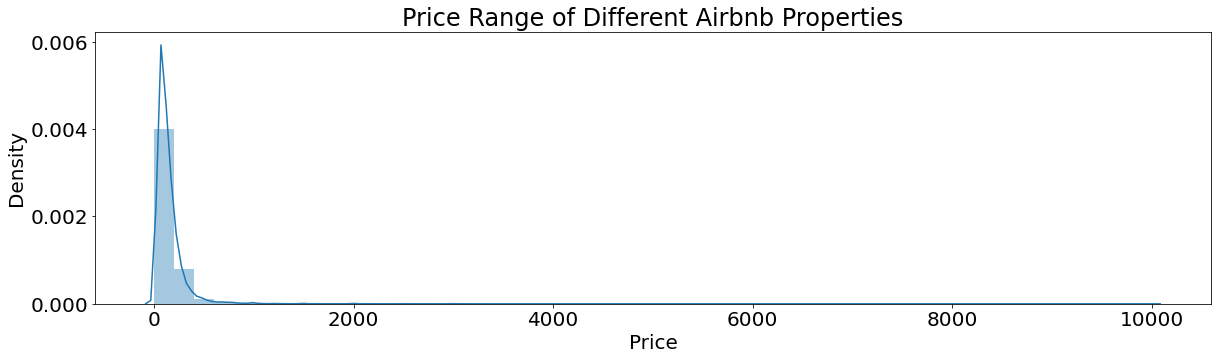

In [ ]:
# Let's use distribution plot for price column
plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size': 20})
sns.distplot(df['price'])

plt.title('Price Range of Different Airbnb Properties')
plt.ylabel('Density')
plt.xlabel('Price')
print(f"Number of total rows: {len(df['price'])}")

We can see overall distribution of price.  
**Most of the 
listings are in range between 0 to 1000 dollars.**   
Very few properties have a price >1000 dollars.

Let's further analyze the range 0 to 1000.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of total rows: 48656


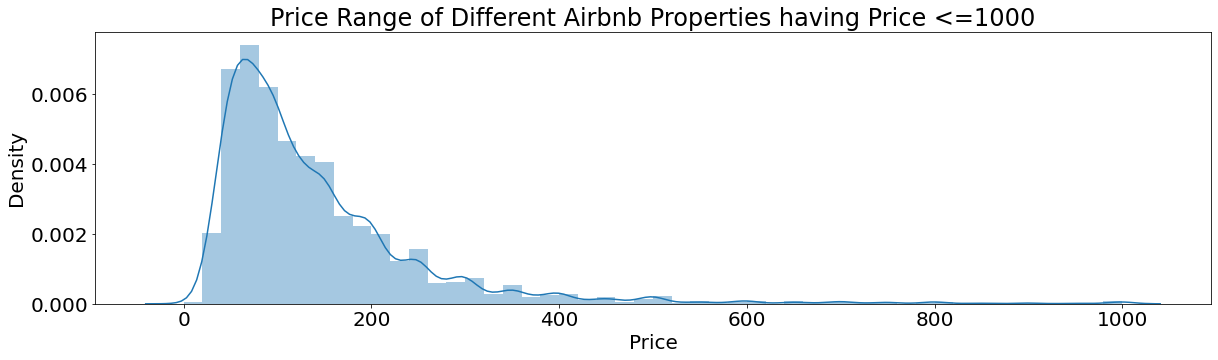

In [ ]:
# properties whose prices are <= 1000 dollars

plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size': 20})
sns.distplot(df[df['price']<=1000]['price'])

plt.title('Price Range of Different Airbnb Properties having Price <=1000')
plt.ylabel('Density')
plt.xlabel('Price')
print(f"Number of total rows: {len(df[df['price']<=1000]['price'])}")

Now if we look at the above distribution. 

**48656 listing are there in the range 0 to 1000 dollars.**

Let's further analyze the price range 0 to 400 dollars

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Number of total rows: 47132


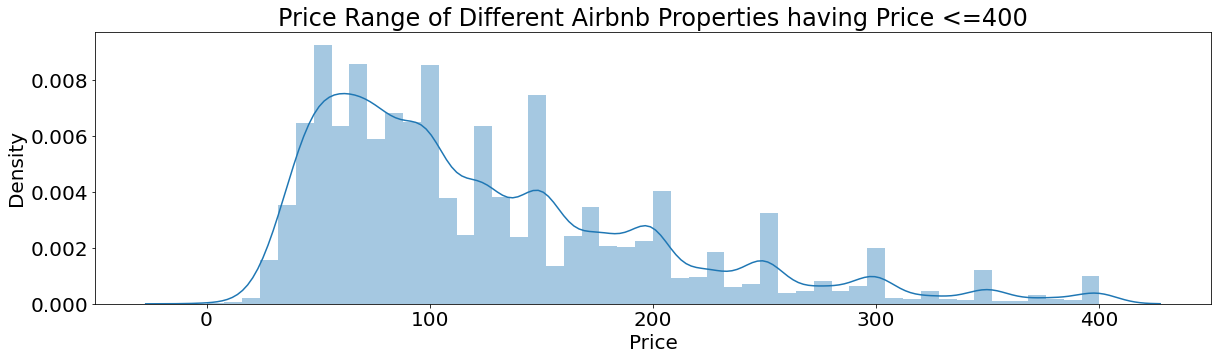

In [ ]:
# properties whose prices are <= 400 dollars

plt.rcParams['figure.figsize']=(20,5)
plt.rcParams.update({'font.size': 20})
sns.distplot(df[df['price']<=400]['price'])
plt.title('Price Range of Different Airbnb Properties having Price <=400')
plt.ylabel('Density')
plt.xlabel('Price')
print(f"Number of total rows: {len(df[df['price']<=400]['price'])}")

If we look at the above graph. 47132 properties lies in this category. 

**So we can say that out of 48895 listings, most listings are in the price range of 0 to 400 dollars**

In [ ]:
# Calculate the %age of properties in each range:
Listings_percentage_less_than_400=(len(df[df['price']<=400]['price'])/len(df['price']))*100
Listings_percentage_greater_than_400=(len(df[df['price']>400]['price'])/len(df['price']))*100
Listings_percentage_with_price_0=len(df[df['price']==0]['price'])


print(f"Percentage of listings having price <=400 dollars: {Listings_percentage_less_than_400}")
print(f'Percentage of listings having price >400 dollars: {Listings_percentage_greater_than_400}')
print(f'number of listings having 0 price:{Listings_percentage_with_price_0}')

Percentage of listings having price <=400 dollars: 96.39431434707025
Percentage of listings having price >400 dollars: 3.6056856529297474
number of listings having 0 price:11


**So around 96% of properties are cheaper than 400 dollars.** Only 3.6% properties are having price more than 400 dollars.

Zero price is mentioned for 11 properties.

## Price analysis for each neighbourhood group and for different type of rooms

In [ ]:
# Check the names of unique neighbourhood groups
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
# Check the types of the rooms available
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# to not show the warnings
import warnings
warnings.filterwarnings("ignore")

**Plot distribution charts for price for each neighbourhood group**

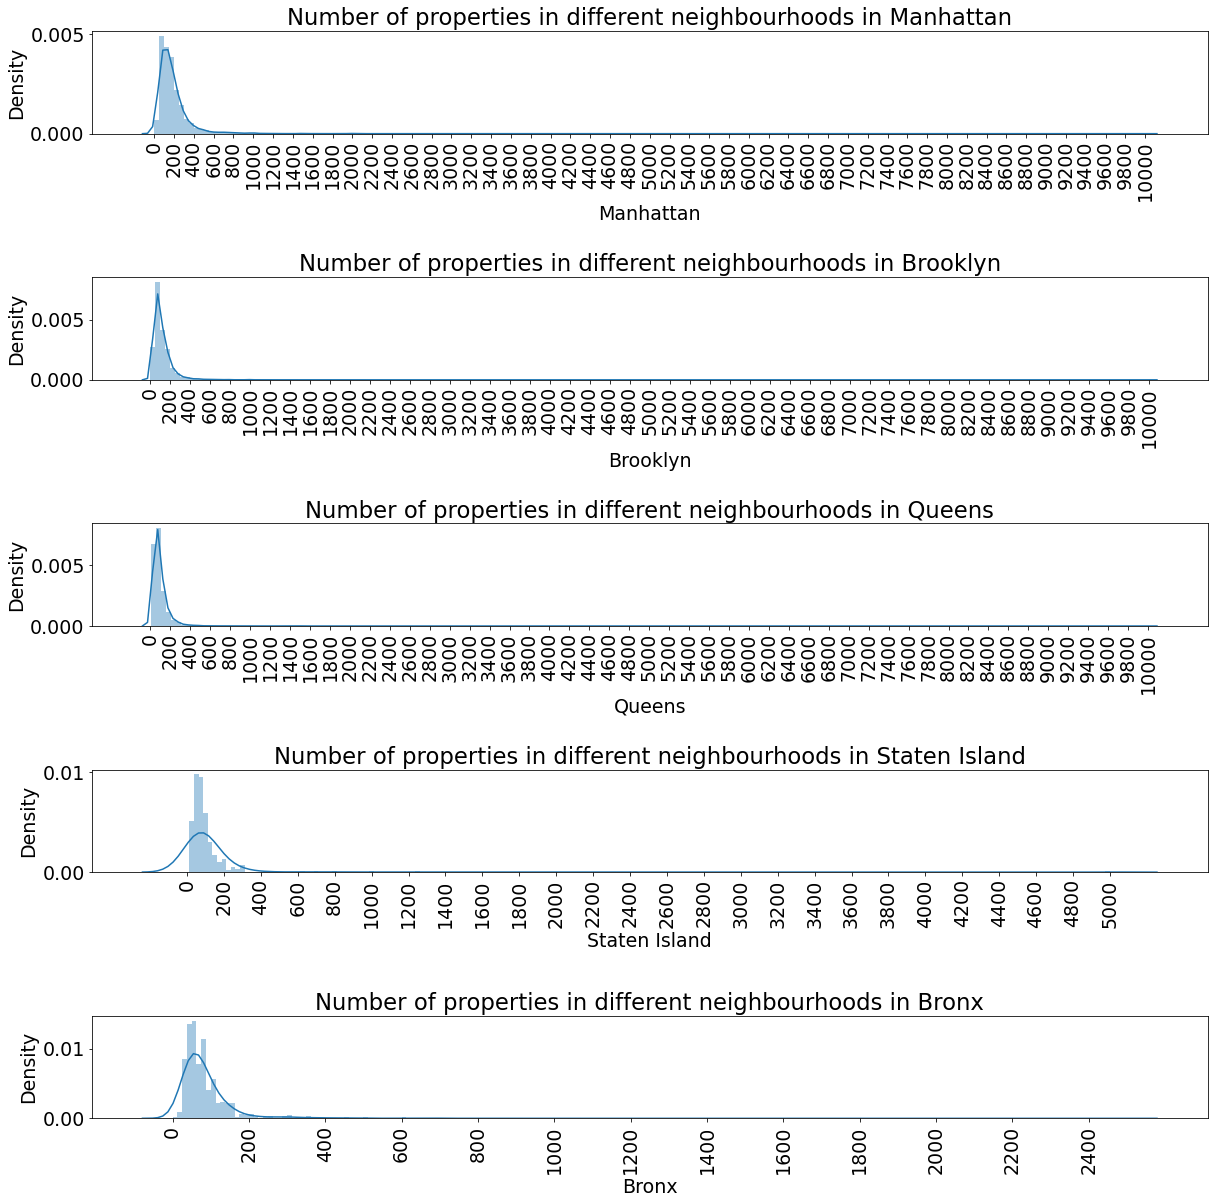

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 19})

for index, neighbourhood_group in {1:'Manhattan',3:'Brooklyn',5:'Queens',7:'Staten Island',9:'Bronx'}.items():
  neighbourhood_counts=df[df['neighbourhood_group'] == neighbourhood_group]['price']
  plt.subplot(9, 1, index)
  sns.distplot(neighbourhood_counts,bins=200)
  plt.title(f'Number of properties in different neighbourhoods in {neighbourhood_group}')
  plt.ylabel('Density')
  plt.xlabel(neighbourhood_group)
  plt.xticks(np.arange(0, df[df['neighbourhood_group'] == neighbourhood_group]['price'].max()+1, 200),rotation=90)

**Plot distribution charts for price for each neighbourhood group further dividing it according to room type**

Private room type in Brooklyn: 10132
Entire home/apt type in Brooklyn: 9559
Shared room type in Brooklyn: 413
Private room type in Manhattan: 7982
Entire home/apt type in Manhattan: 13199
Shared room type in Manhattan: 480
Private room type in Queens: 3372
Entire home/apt type in Queens: 2096
Shared room type in Queens: 198
Private room type in Staten Island: 188
Entire home/apt type in Staten Island: 176
Shared room type in Staten Island: 9
Private room type in Bronx: 652
Entire home/apt type in Bronx: 379
Shared room type in Bronx: 60


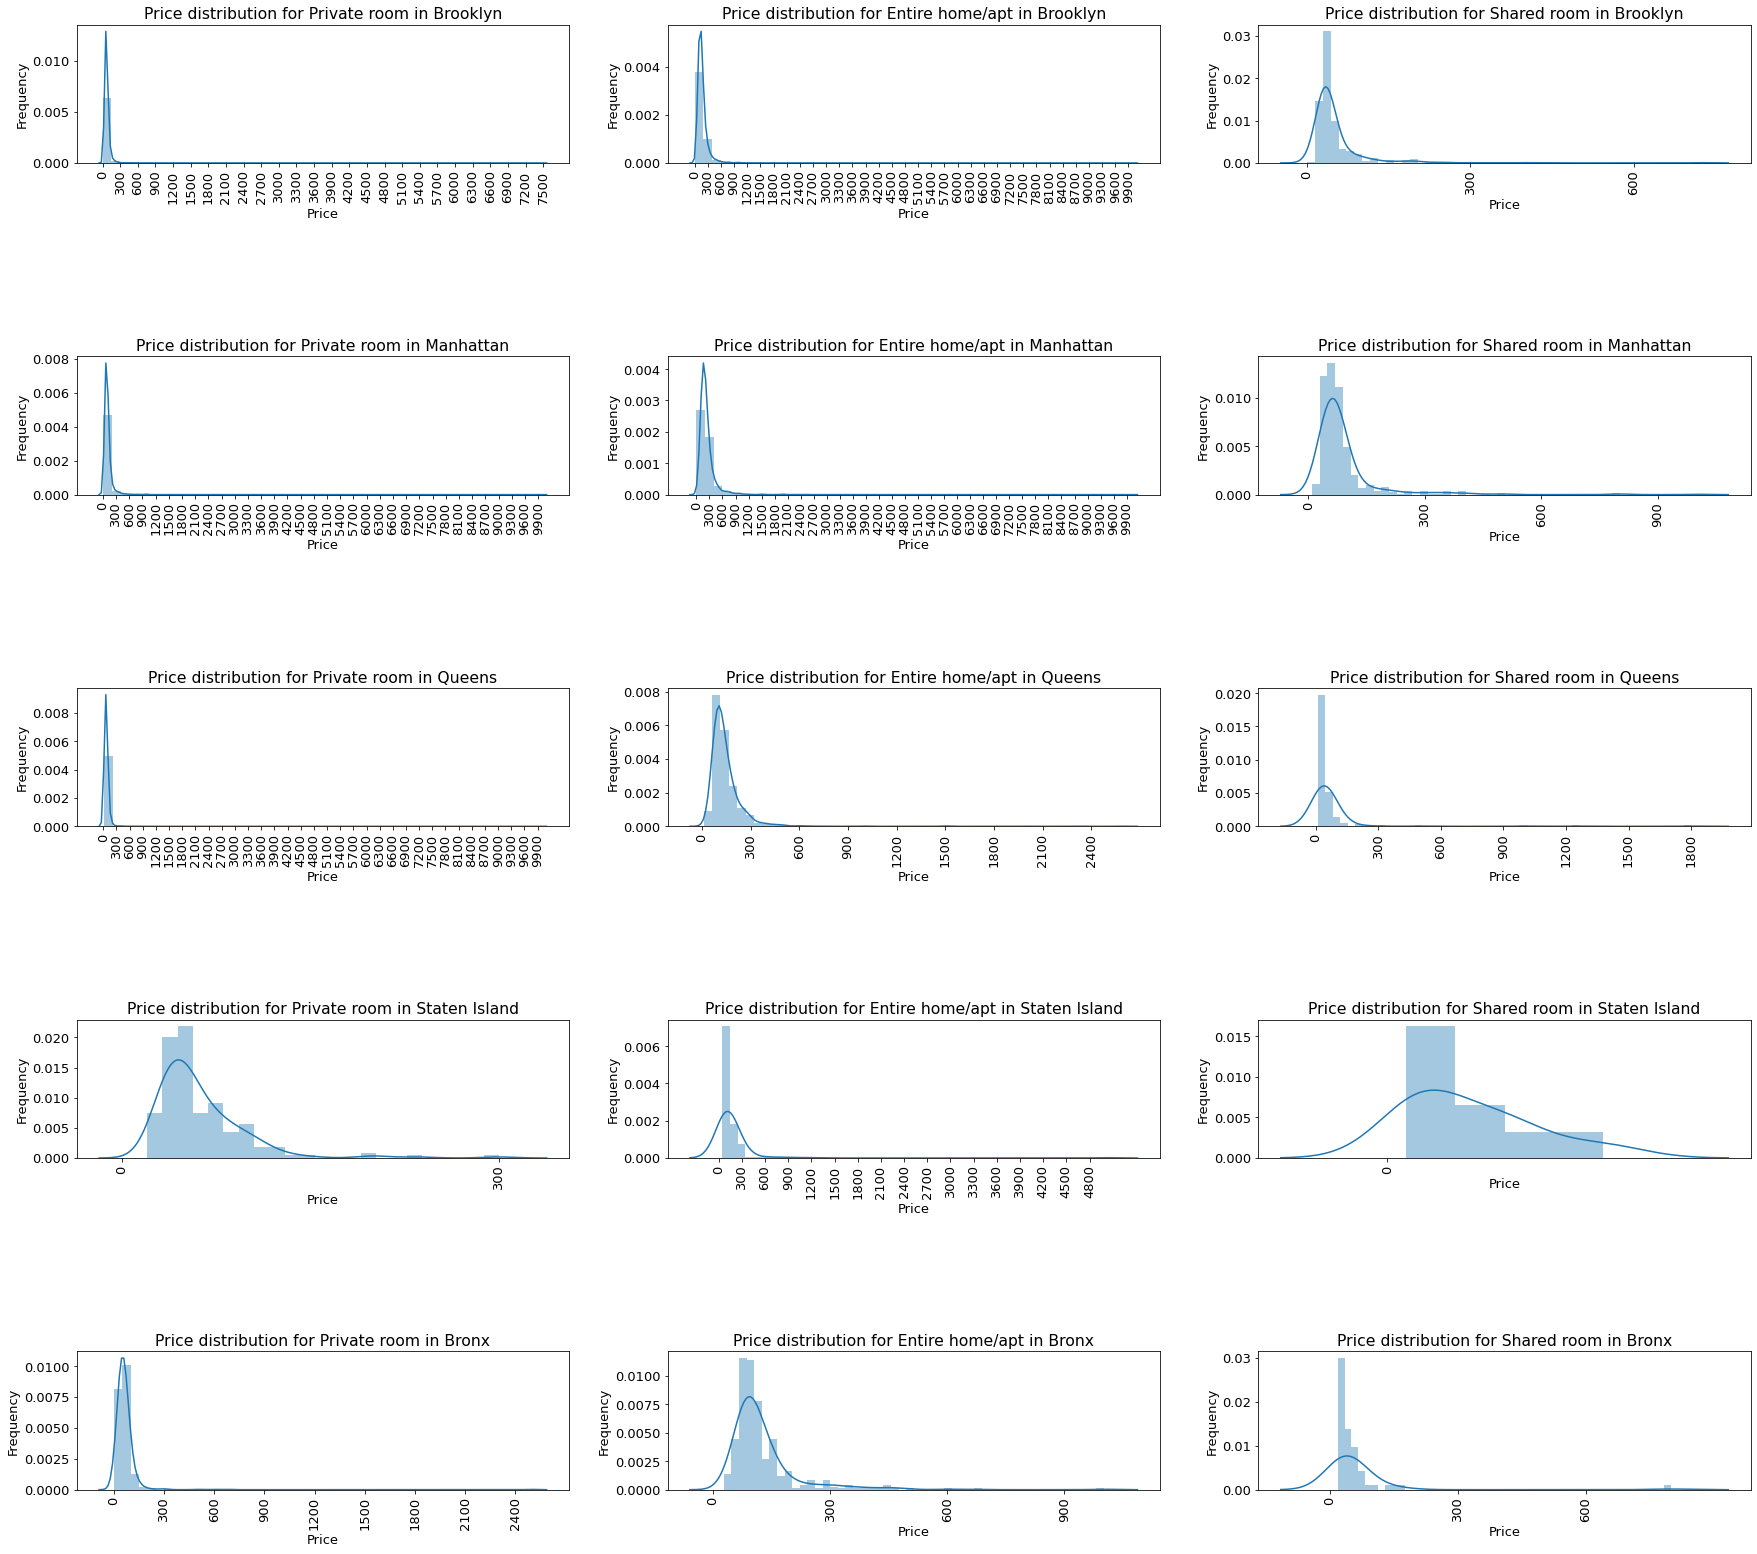

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=(30,30)
plt.rcParams.update({'font.size': 13})

index=1
for neighbourhood_group in df['neighbourhood_group'].unique():
  for  room in df['room_type'].unique():
    price_count=df[(df['neighbourhood_group']==neighbourhood_group)&(df['room_type']==room)]['price']
    q=len(price_count)
    print(f"{room} type in {neighbourhood_group}: {q}")
    
    plt.subplot(10, 3, index)    
    sns.distplot(price_count)    
    plt.title(f'Price distribution for {room} in {neighbourhood_group}')
    plt.ylabel('Frequency')
    plt.xlabel('Price')
    plt.xticks(np.arange(0, df[(df['neighbourhood_group']==neighbourhood_group)&(df['room_type']==room)]['price'].max()+1, 300),rotation=90)
    index=index+1  
  index=index+3

**From above graph we can conclude that in every borough of New York city, shared room prices are less as comapred to private rooms and entire home/apartment.**

## Look at the average price according to room type and neighbourhood group

{'Private room': 89.78097285675894, 'Entire home/apt': 211.79424613325986, 'Shared room': 70.12758620689655}
{'Brooklyn': 124.38320732192598, 'Manhattan': 196.8758136743456, 'Queens': 99.51764913519237, 'Staten Island': 114.81233243967829, 'Bronx': 87.4967919340055}


Text(0, 0.5, 'Average Price')

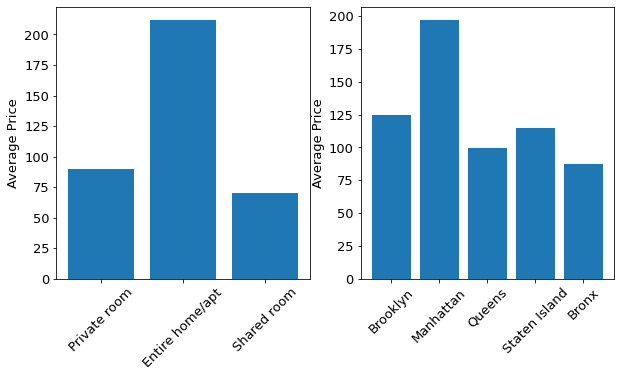

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams.update({'font.size': 13})

# create a dictionary for room type and their respective average price
room_type_avg_price={}
for i, room_type in enumerate(df['room_type'].unique()):
  room_type_avg_price[room_type]=df[df['room_type']==room_type]['price'].mean()
print(room_type_avg_price)
plt.subplot(1, 2, 1)
plt.bar(x=room_type_avg_price.keys(),height=room_type_avg_price.values(),width=0.8)
plt.xticks(rotation=45)
plt.ylabel('Average Price')

# create a dictionary for neighbourhood group and their respective average price
group_avg_price={}
for i, neighbourhood_group in enumerate(df['neighbourhood_group'].unique()):
  group_avg_price[neighbourhood_group]=df[df['neighbourhood_group']==neighbourhood_group]['price'].mean()
print(group_avg_price)
plt.subplot(1, 2, 2)
plt.bar(x=group_avg_price.keys(),height=group_avg_price.values(),width=0.8)
plt.xticks(rotation=45)
plt.ylabel('Average Price')

**Look at the above bar plots, we can say that entire home/apt are most expensive type of rooms and shared rooms are the cheapest.**

**Manhattan and Brooklyn are the most expensive boroughs compared to other 3 boroughs.**

## Number of properties available in %age in different neighbourhood groups and according to room type

Text(0.5, 1.0, '% Number of properties with respect to room type')

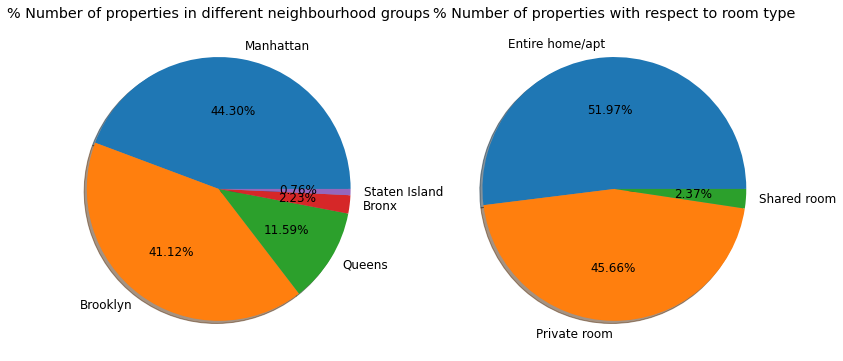

In [ ]:
plt.rcParams['figure.figsize']=(13,10)
plt.rcParams.update({'font.size': 12})

# Create a pie chart for % number of properties in each neighbourhood group
neighbourhood_group_dict=dict(df['neighbourhood_group'].value_counts())
value=neighbourhood_group_dict.keys()
plt.subplot(1, 2, 1)
plt.pie(df['neighbourhood_group'].value_counts(),labels=value,shadow=True,autopct='%1.2f%%')
plt.title('% Number of properties in different neighbourhood groups')

# Create a pie chart for % number of properties according to room type
room_type=df['room_type'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(room_type,labels=dict(room_type).keys(),shadow=True,autopct='%1.2f%%')
plt.title('% Number of properties with respect to room type')


**New York City is composed of five boroughs Bronx, Brooklyn, Manhattan, Queens, and Staten Island.**
1. From above pie chart we can see that Manhattan and Brooklyn are places which have maximum Airbnb properties. It is so because Manhattan is the cultural, administrative, and financial center of New York City and contains the headquarters of many major multinational corporations, the United Nations Headquarters, Wall Street, and a number of important universities and brooklyn is most populated borough.(from wikipedia)
2.Staten Island is having least population thats why Airbnb properties are less.
3.It is uncomfortable for vistiors to share room with unkown persons so visitors basically prefer private rooms or entire homes. Bookings for shared rooms will be less that will lead to less revenue generation from the same type of rooms. Thats why hosts prefer to list private room or entire home.

## Find out the number of properties available in the neighbours for each neighbourhood group 


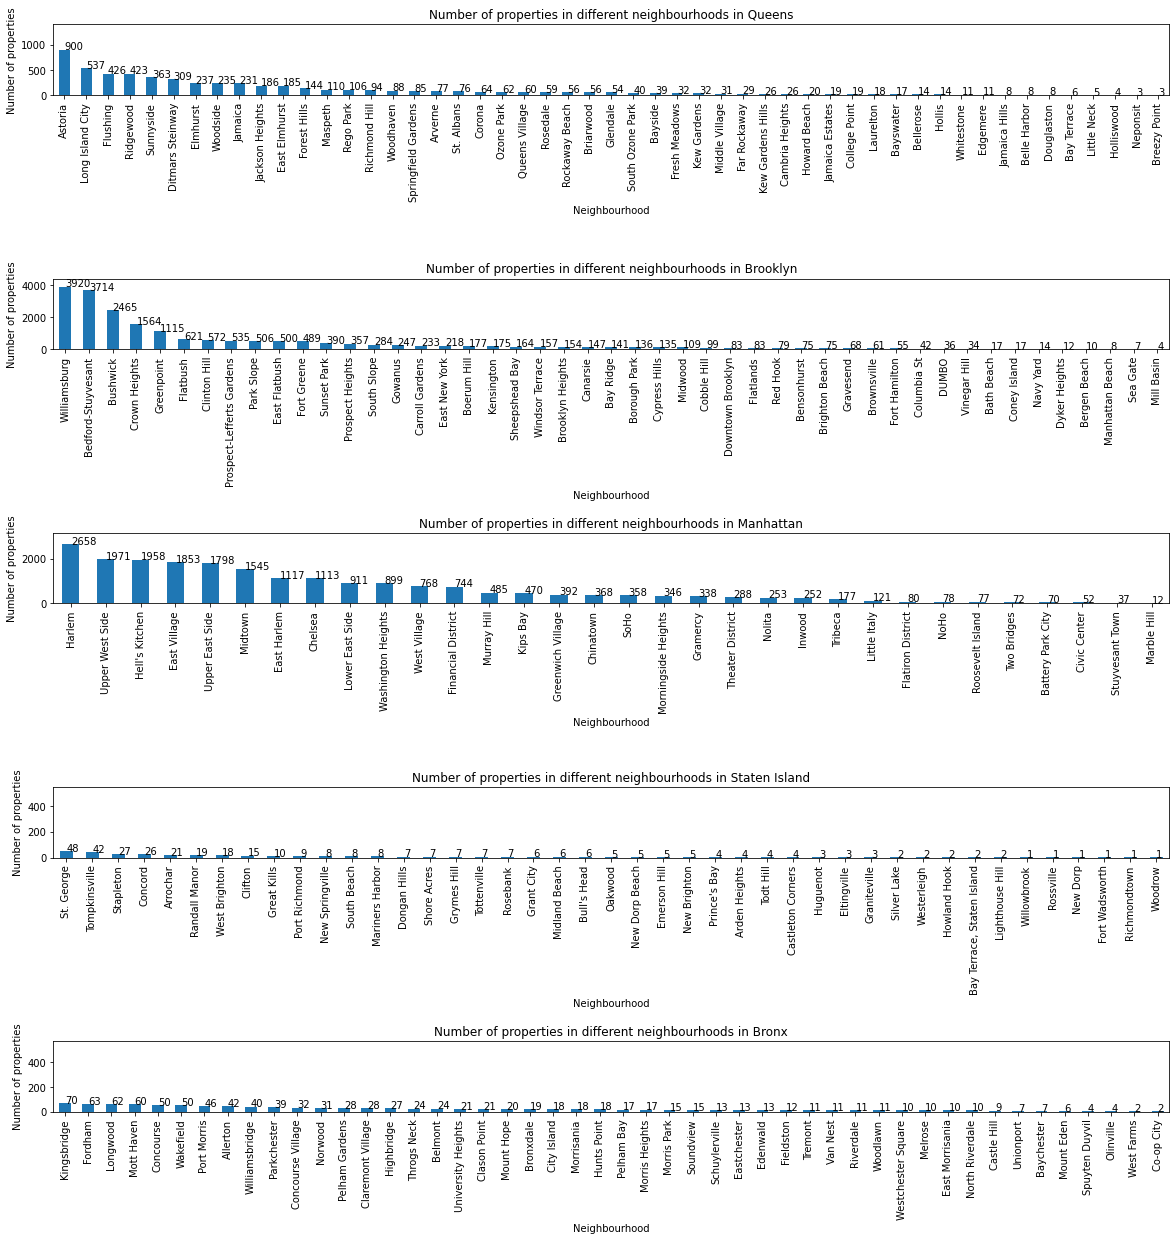

In [ ]:
# We can use subplots
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams.update({'font.size': 10})

for index, neighbourhood_group in {1:'Queens',4:'Brooklyn',7:'Manhattan',10:'Staten Island',13:'Bronx'}.items():
  neighbourhood_counts=df[df['neighbourhood_group'] == neighbourhood_group]['neighbourhood'].value_counts()

  plt.subplot(13, 1, index)
  neighbourhood_counts.plot(kind='bar',ylim=(0,neighbourhood_counts.iloc[0]+500))
  for i in range(len(neighbourhood_counts)):
    plt.text(i,neighbourhood_counts.iloc[i],neighbourhood_counts.iloc[i] )

  plt.title(f'Number of properties in different neighbourhoods in {neighbourhood_group}')
  plt.ylabel('Number of properties')
  plt.xlabel('Neighbourhood')


Look at the above bar charts. Manhattan and Brooklyn are showing huge number of properties, Bronx and Staten Island are showing less number of properties. Same results we have seen earlier in pie chart.

**Maximum number of properties:**

In Manhattan: Harlem: 2658  
In Brooklyn: Williamsburg: 3920  
In Queens: Astoria: 900  
In Bronx: Kingsbridge: 70  
In Staten Island: St. George:48

## Hosts who have maximun and minimum number of properties 

In [ ]:
#hosts that have listed only one property
host_id_dict=dict(df['host_id'].value_counts())
key1=host_id_dict.keys()
hostid_value=[]
for keys,values in host_id_dict.items():
  if host_id_dict[keys]==1:
    hostid_value.append(keys)
    
print(f'There are {len(hostid_value)} hosts that had listed only one property on Airbnb')

There are 32303 hosts that had listed only one property on Airbnb


So we don't neet to find out the lowest property holder as there are already 66.06% hosts listed only one property on Airbnb.

### Let's look at the hosts that hold most number of properties

{219517861: 327, 107434423: 232, 30283594: 121, 137358866: 103, 12243051: 96, 16098958: 96, 61391963: 91, 22541573: 87, 200380610: 65, 7503643: 52, 1475015: 52, 120762452: 50, 2856748: 49, 205031545: 49, 190921808: 47, 26377263: 43, 2119276: 39, 19303369: 37, 25237492: 34, 119669058: 34, 76104209: 33, 113805886: 33, 213781715: 33, 238321374: 32, 51501835: 31, 50760546: 31, 224414117: 30, 13347167: 29, 39528519: 28, 417504: 28, 226410657: 27, 9864136: 26, 230192510: 25, 131647128: 25, 3191545: 23, 221200420: 23, 242962235: 23, 16437254: 21, 252604696: 20, 48146336: 20, 7245581: 19, 95459395: 18, 134184451: 18, 3250450: 18, 177174475: 17, 216235179: 17, 159091490: 17, 201015598: 17, 9293730: 16, 200239515: 15, 6885157: 15, 5962328: 15, 260639745: 15, 23772724: 15, 61396454: 14, 204852306: 14, 17770287: 14, 260425153: 14, 248161322: 14, 211549023: 13, 260618374: 13, 47554473: 13, 344035: 13, 244817841: 13, 64065593: 13, 310670: 13, 156505456: 13, 162280872: 13, 5144567: 13, 16677326: 12, 

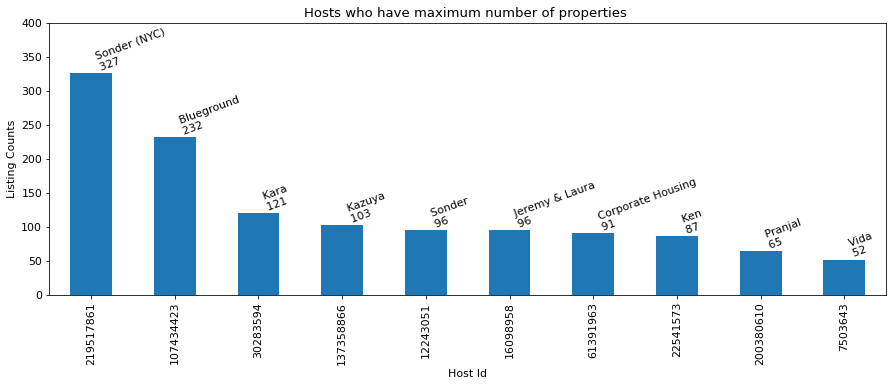

In [ ]:
# Host ids of the hosts who have maximum number of properties
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams.update({'font.size': 11})

host_id_counts=df['host_id'].value_counts().head(10)
host_id_counts.plot(kind='bar',)

for i in range(len(host_id_counts)):
  plt.text(i,host_id_counts.iloc[i]+2,f" {df[df['host_id']==host_id_counts.index[i]]['host_name'].iloc[0]} \n {host_id_counts.iloc[i]}",rotation=20 )

plt.title('Hosts who have maximum number of properties ')
plt.ylabel('Listing Counts')
plt.xlabel('Host Id')
plt.yticks(np.arange(0, df['host_id'].value_counts().iloc[0]+100, 50))
host_id_dict=dict(df['host_id'].value_counts())
print(host_id_dict)

Sonder (NYC), Blueground, Kara and Kazuya have more than 100 listings.

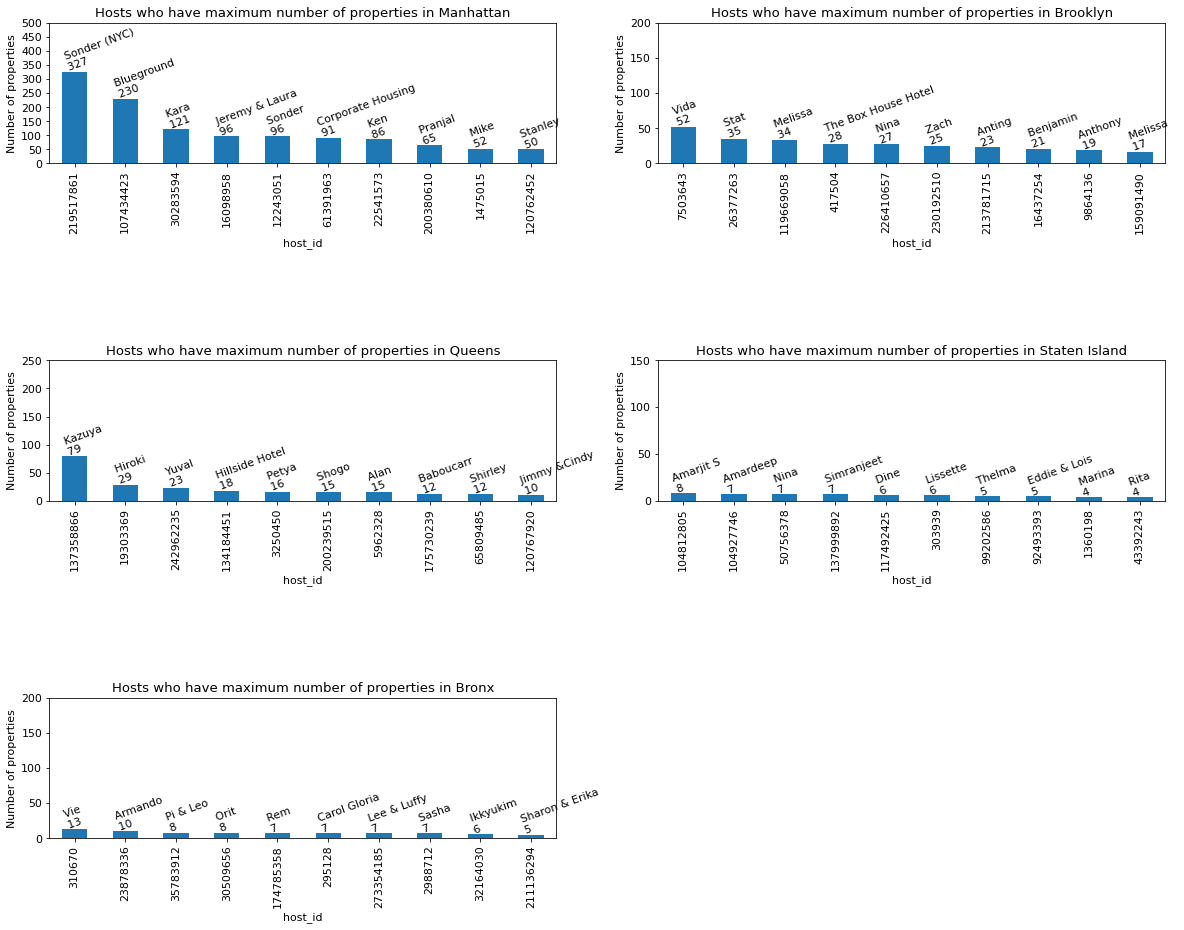

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)

# Host ids of the hosts who have maximum number of properties in different neighbourhood groups
for index, neighbourhood_group in {1:'Manhattan',2:'Brooklyn',5:'Queens',6:'Staten Island',9:'Bronx'}.items():
  host_id=df[df['neighbourhood_group'] == neighbourhood_group]['host_id'].value_counts().head(10)
  plt.subplot(5, 2, index)
  host_id.plot(kind='bar',ylim=(0,host_id.iloc[0]+50))
  for i in range(len(host_id)):
   plt.text(i-0.3,host_id.iloc[i],f" {df[df['host_id']==host_id.index[i]]['host_name'].iloc[0]} \n {host_id.iloc[i]}",rotation=20 )
  plt.title(f'Hosts who have maximum number of properties in {neighbourhood_group}')
  plt.ylabel('Number of properties')
  plt.xlabel('host_id')
  plt.yticks(np.arange(0, df[df['neighbourhood_group'] == neighbourhood_group]['host_id'].value_counts().iloc[0]+190, 50))

**We can say that 8 out of 10 hosts that are having most number of properties, have almost all the properties in Manhattan.** It is so because out of five boroughs of the New York City manhattan is the most popular borough and there are other reasons mentioned earlier.

## Number of rooms according to their types with respect to different neighbourhod groups

In [ ]:
#privte room value count on basis of neighbourhood group.
staten_private=len(df[(df['neighbourhood_group'] == 'Staten Island')& (df['room_type']=='Private room')].value_counts())
manhattan_private=len(df[(df['neighbourhood_group'] == 'Manhattan')& (df['room_type']=='Private room')].value_counts())
brooklyn_private=len(df[(df['neighbourhood_group'] == 'Brooklyn')& (df['room_type']=='Private room')].value_counts())
queens_private=len(df[(df['neighbourhood_group'] == 'Queens')& (df['room_type']=='Private room')].value_counts())
bronx_private=len(df[(df['neighbourhood_group'] == 'Bronx')& (df['room_type']=='Private room')].value_counts())

In [ ]:
#entire home/apt value count on basis of neighbourhood group.
staten_home=len(df[(df['neighbourhood_group'] == 'Staten Island')& (df['room_type']=='Entire home/apt')].value_counts())
manhattan_home=len(df[(df['neighbourhood_group'] == 'Manhattan')& (df['room_type']=='Entire home/apt')].value_counts())
brooklyn_home=len(df[(df['neighbourhood_group'] == 'Brooklyn')& (df['room_type']=='Entire home/apt')].value_counts())
queens_home=len(df[(df['neighbourhood_group'] == 'Queens')& (df['room_type']=='Entire home/apt')].value_counts())
bronx_home=len(df[(df['neighbourhood_group'] == 'Bronx')& (df['room_type']=='Entire home/apt')].value_counts())

In [ ]:
#shared room value count on basis of neighbourhood group.
staten_seprate=len(df[(df['neighbourhood_group'] == 'Staten Island')& (df['room_type']=='Shared room')].value_counts())
manhattan_seprate=len(df[(df['neighbourhood_group'] == 'Manhattan')& (df['room_type']=='Shared room')].value_counts())
brooklyn_sepratae=len(df[(df['neighbourhood_group'] == 'Brooklyn')& (df['room_type']=='Shared room')].value_counts())
queens_seprate=len(df[(df['neighbourhood_group'] == 'Queens')& (df['room_type']=='Shared room')].value_counts())
bronx_seprate=len(df[(df['neighbourhood_group'] == 'Bronx')& (df['room_type']=='Shared room')].value_counts())

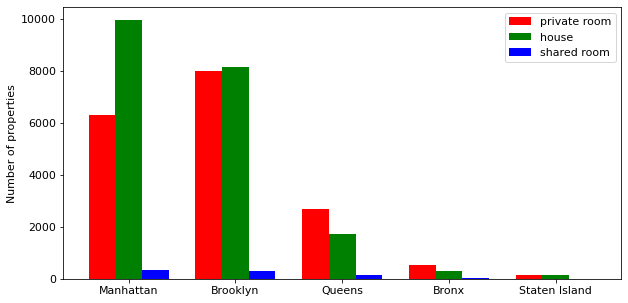

In [ ]:
# plot a bar chart for the number of properties for each type of room
plt.rcParams["figure.figsize"] = (10,5)
N = 5
ind = np.arange(N) 
width = 0.25
  
private_room = [manhattan_private,brooklyn_private,queens_private,bronx_private,staten_private]
bar1 = plt.bar(ind, private_room, width, color = 'r')
  
house = [manhattan_home,brooklyn_home,queens_home,bronx_home,staten_home]
bar2 = plt.bar(ind+width, house, width, color='g')
shared_room = [manhattan_seprate,brooklyn_sepratae,queens_seprate,bronx_seprate,staten_seprate]
bar3 = plt.bar(ind+width*2,shared_room,width,color='b')
plt.xticks(ind+width,['Manhattan' ,'Brooklyn', 'Queens','Bronx' ,'Staten Island'])
plt.legend( (bar1, bar2,bar3), ('private room', 'house','shared room') )
plt.ylabel('Number of properties')
plt.show()


**From this bar chart we can see that number of shared rooms is less in each neighbourhood group, compared to other type of rooms.**

**If we talk about private and entire home, entire houses are more with comparision to private rooms in Manhattan and Brooklyn but in Queens, Bronx, Staten Island situation is opposite.**



## Analysis on monthly review column

Text(0.5, 1.0, 'Monthly review distribution')

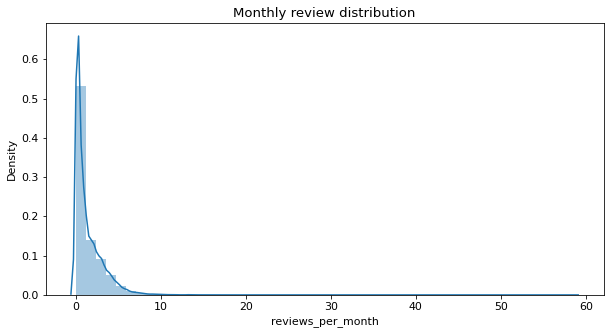

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.distplot(df['reviews_per_month'])
plt.title('Monthly review distribution')


**From above graph we can conclude that most number of properties have <=10 reviews per month. Only few properties have good reviews.**


## Lets start analyzing further to find the properties with good number of reviews.

72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text major ticklabel objects>)

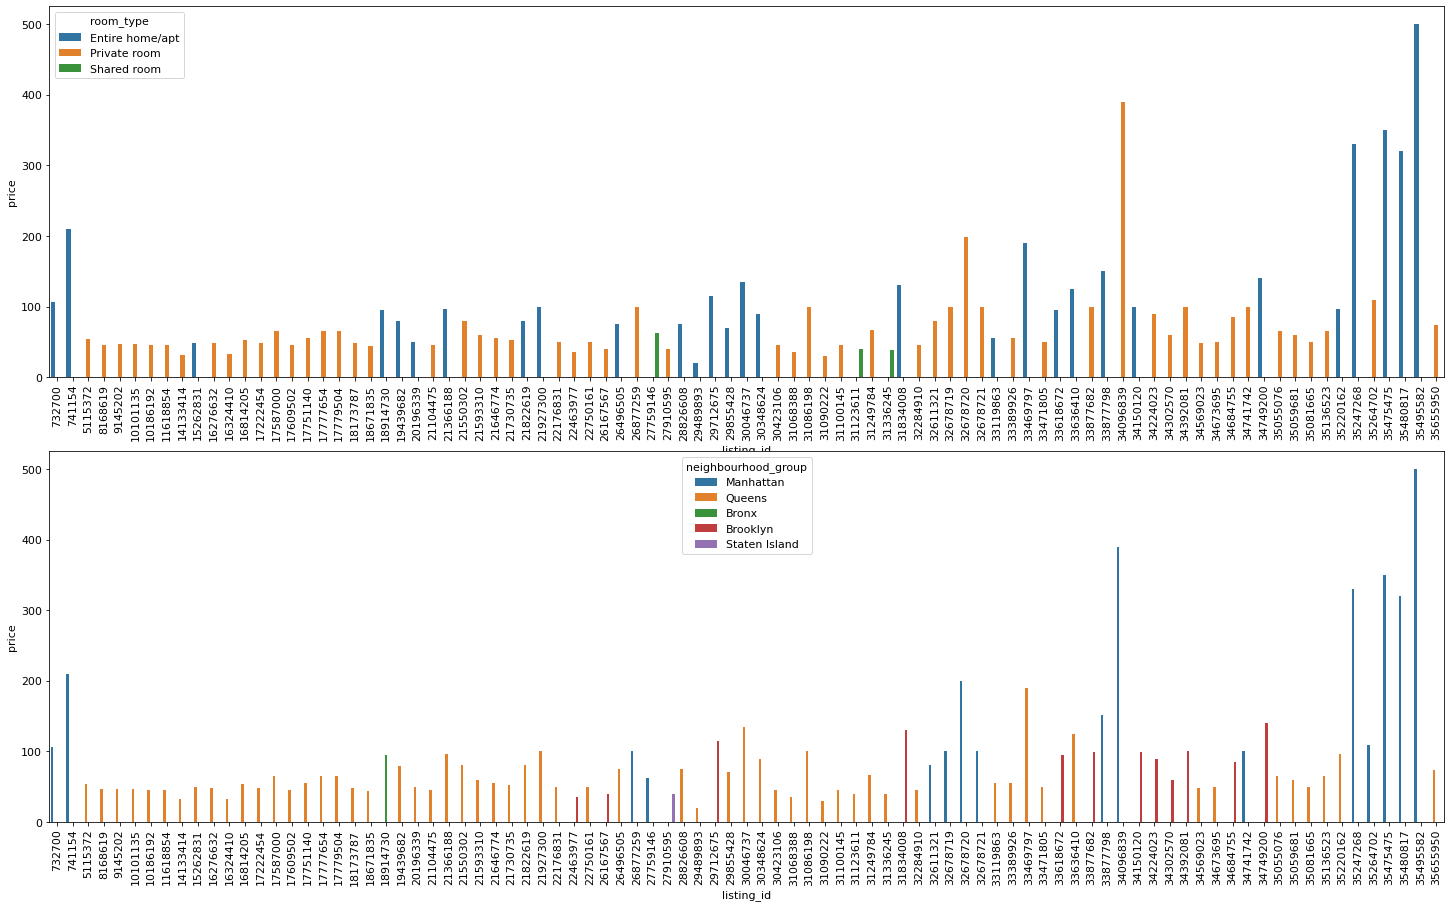

In [ ]:
#Create a bar chart showing properties with monthly review range 10 to 60
print(len(df[(df['reviews_per_month']>=10) & (df['reviews_per_month']<=60)]['reviews_per_month'].value_counts()))
plt.rcParams['figure.figsize']=(25,15)
{'height_ratios': [1, 1]}
reviews_df=df[(df['reviews_per_month']>=10)&(df['reviews_per_month']<=60)]
plt.subplot(2,1,1)
sns.barplot(x='listing_id', y='price',data=reviews_df,hue='room_type',ci=None)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.barplot(x='listing_id', y='price',data=reviews_df,hue='neighbourhood_group',ci=None)
plt.xticks(rotation=90)

Above graph is to show the properties that have monthly reviews between 10 to 60. Their price is less than 500 dollars.  

**We can conclude that properties having good amount of monthly reviews have price less than 500 dollars that means users basically prefer properties withing this range. And there are only 72 porperties who have good number of monthly reviews.**

**In the first bar chart we can say that Entire homes and private rooms have good number of monthly reviews, and in the second bar chart listings in Manhattan and Queens have good number of monthly reviews.**



## Let's check the busiest host

If we look at the dataframe, we can say price, place and reviews per month will be deciding factors for, how much busy a host is. But price and place alone can't decide this. **We can consider only reviews per month column to decide if a host is busy or not.**

([<matplotlib.axis.YTick at 0x7f87f0d9c610>,
 <a list of 12 Text major ticklabel objects>)

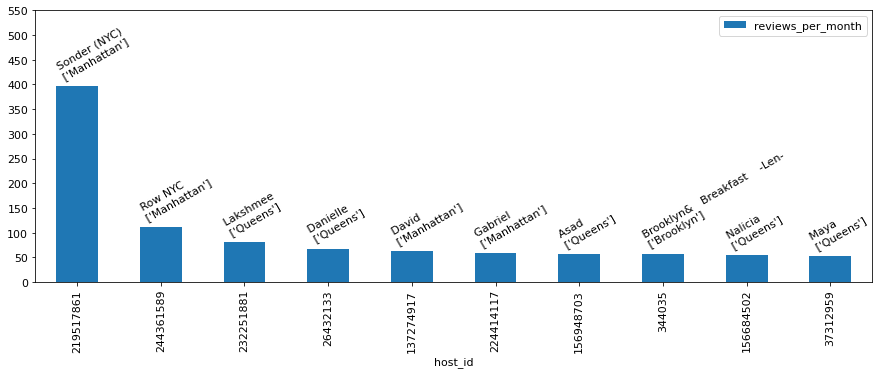

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
# find the top 10 hosts with most reviews per month and crerate a bar chart
df2= df.groupby('host_id')['reviews_per_month'].sum().sort_values(ascending=False).iloc[:10].reset_index()
df2.plot.bar(x='host_id',y='reviews_per_month')

# write labels on each bar that shows the corresponding host name and neighbourhood group
for i in range(len(df2)):
  plt.text(i-0.3,df2.reviews_per_month.iloc[i]+10,f" {df[df['host_id']==df2.host_id.iloc[i]]['host_name'].iloc[0]} \n {df[df['host_id']==df2['host_id'].iloc[i]]['neighbourhood_group'].unique()} " ,rotation=30)

plt.yticks(np.arange(0, 600, 50))

**We can say that most of the busiest hosts are in Manhattan and Queens.**

## Scatter plots for other variables to see if theres is any correlation

Text(0.5, 0, 'booking_availability')

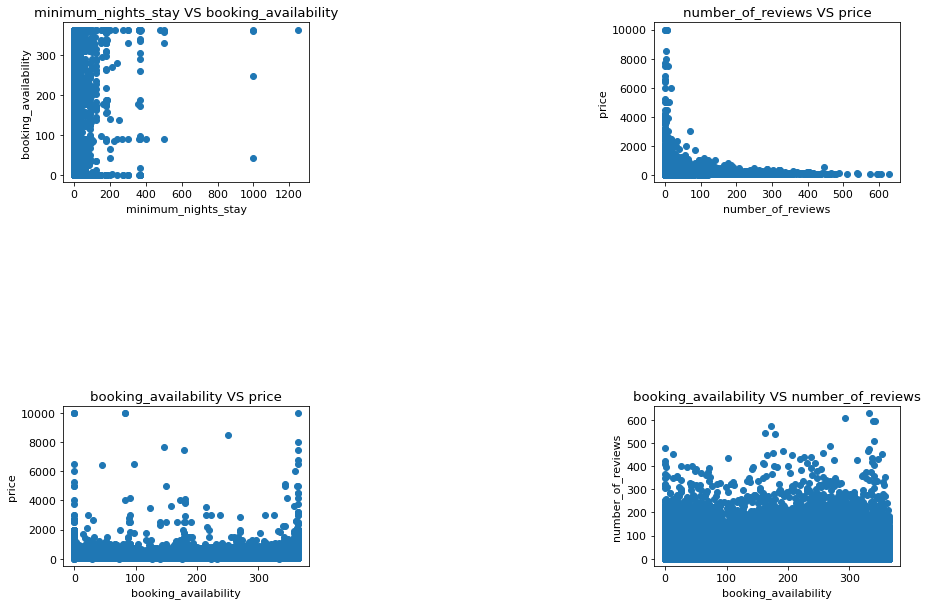

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# minimum_nights VS availability_365
plt.subplot(3,3,1)
plt.scatter(df['minimum_nights_stay'], df['booking_availability'])
plt.title('minimum_nights_stay VS booking_availability')
plt.ylabel('booking_availability')
plt.xlabel('minimum_nights_stay')

# number of reviews VS price
plt.subplot(3,3,3)
plt.scatter(df['number_of_reviews'], df['price'])
plt.title('number_of_reviews VS price')
plt.ylabel('price')
plt.xlabel('number_of_reviews')

# availability_365 VS price
plt.subplot(3,3,7)
plt.scatter(df['booking_availability'], df['price'])
plt.title('booking_availability VS price')
plt.ylabel('price')
plt.xlabel('booking_availability')

#availability VS number of reviews
plt.subplot(3,3,9)
plt.scatter(df['booking_availability'], df['number_of_reviews'])
plt.title('booking_availability VS number_of_reviews')
plt.ylabel('number_of_reviews')
plt.xlabel('booking_availability')


**Price vs number of reviews graph tells us that there are maximum number of reviews for the properties whose prices are less than 2000 dollars, so very less people prefer highly priced properties.**

# **Data Cleaning and Outlier treatment**

## **Data Cleaning**

 **Four columns have null values : 'listing_details', 'host_name', 'last_review_date',** **'reviews_per_month'** 

In [ ]:
# check, how many rows are left after removal of rows with atleast one null value
non_null_df=df.dropna()

In [ ]:
non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      38821 non-null  int64  
 1   listing_details                 38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights_stay             38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review_date                

 **Almost 10K rows have been removed after removal of rows with atleast one null value. It means removal of almost 20% data. So we can go with our original Data Frame**

In [ ]:
# we can fill the null values with 'not present' in the columns: listing_details and host_name 
df['listing_details'].fillna('not present',inplace=True)
df['host_name'].fillna('not present',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48895 non-null  int64  
 1   listing_details                 48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights_stay             48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review_date                

In [ ]:

df.head(10)

listing_id  ... booking_availability
0        2539  ...                  365
1        2595  ...                  355
2        3647  ...                  365
3        3831  ...                  194
4        5022  ...                    0
5        5099  ...                  129
6        5121  ...                    0
7        5178  ...                  220
8        5203  ...                    0
9        5238  ...                  188

[10 rows x 16 columns]

In [ ]:
#Now we can check other columns that have null values. ('last_review_date','reviews_per_month')
# check type of 'last_review_date' column
type(df['last_review_date'][0])

str

In [ ]:
type(df['reviews_per_month'][0])

numpy.float64

In [ ]:
# so 'last_review_date' column have strings as elements, but the elements can be converted into DateTime object. 
# Another column that has null values is 'reviews_per_month', this column has float datatype elements 

### We can check why 'last_review_date' and 'reviews_per_month' columns have so many null values.

In [ ]:
# total null values are same in both the columns : 10052. so let's check if null values in both the columns are in the same row
# use boolean indexing
df[df['last_review_date'].isna() & df['reviews_per_month'].isna()]

listing_id  ... booking_availability
2            3647  ...                  365
19           7750  ...                  249
26           8700  ...                    0
36          11452  ...                  365
38          11943  ...                  365
...           ...  ...                  ...
48890    36484665  ...                    9
48891    36485057  ...                   36
48892    36485431  ...                   27
48893    36485609  ...                    2
48894    36487245  ...                   23

[10052 rows x 16 columns]

In [ ]:
len(df[df['last_review_date'].isna() & df['reviews_per_month'].isna()])

10052

In [ ]:
len(df[df['last_review_date'].isna()|df['reviews_per_month'].isna()])

10052

So when we use boolean indexing on both of the columns. We can see the output. Number of rows where values in both the columns(used '&' operator) are null is 10052. Number of rows where value in at least one columns is null(used 'or' operator) is 10052. That means where 'last_review_date' date is not available , 
'reviews_per_month' also is not available.

Let's check why this is happening. let's check another column related to reviews, that is 'number_of_reviews'. If we check again the output dataframe  above after boolean indexing and look at the 'number_of _reviews' column, values are zero for this column.

Let's use boolean indexing again taking this column too into consideration.


In [ ]:
len(df[df['last_review_date'].isna() & df['reviews_per_month'].isna() & (df['number_of_reviews']==0)])

10052

So for all the null values in 'last_review_date' and 'reviews_per_month' columns, 'number_of_reviews' are zero.
let's check how many zero values are there in the 'number_of_reviews' column.

In [ ]:
len(df[df['number_of_reviews']==0])

10052

So number of values having zero in the column 'number_of_reviews' is 10052, that is the same number of null values in 'last_review_date' column and 'reviews_per_month' column.

**So we can reach to this conclusion that, if number of reviews are zero, that means either this listing(property) is new on the Airbnb platform and no one has booked the property yet or if someone has done the bookings for the listing and used the service but he or she has not given the review.** 

**That is why date of the last review (in 'last_review_date' column) and reviews per month is not available for the rows having number of reviews zero.**

**So we can have all the null values in 'last_review' column and 'reviews_per_month' column. and the 'zero' values in 'number_of_reviews' column. Because it seems genuine and no value was missed during the data collection.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48895 non-null  int64  
 1   listing_details                 48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights_stay             48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review_date                

### Check the descriptive summary

In [ ]:
df.describe()

listing_id  ...  booking_availability
count  4.889500e+04  ...          48895.000000
mean   1.901714e+07  ...            112.781327
std    1.098311e+07  ...            131.622289
min    2.539000e+03  ...              0.000000
25%    9.471945e+06  ...              0.000000
50%    1.967728e+07  ...             45.000000
75%    2.915218e+07  ...            227.000000
max    3.648724e+07  ...            365.000000

[8 rows x 10 columns]

In [ ]:
# check the minimum price. It is 0. It should not be zero. Check how many rows are there with price zero

len(df[df['price']==0])

11

In [ ]:
df[df['price']==0]

listing_id  ... booking_availability
23161    18750597  ...                   28
25433    20333471  ...                  127
25634    20523843  ...                    0
25753    20608117  ...                    0
25778    20624541  ...                   73
25794    20639628  ...                  176
25795    20639792  ...                  232
25796    20639914  ...                  222
26259    20933849  ...                    0
26841    21291569  ...                  333
26866    21304320  ...                  139

[11 rows x 16 columns]

There are 11 rows with price value zero. Let's see if we can drop these rows.
if we check corresponding reviews per month, some of the values are greater than the mean reviews per month. Same is with corresponding number of reviews values. There are good number of reviews for some listings.

**So rather than removing these rows we can replace zero value with median value**

In [ ]:
df['price']=np.where(df['price']==0,df['price'].median(),df['price'])

In [ ]:
# Check a row where price was zero, now it's replaced with median price
df.loc[26866]

listing_id                                                      21304320
listing_details                   Best Coliving space ever! Shared room.
host_id                                                        101970559
host_name                                                         Sergii
neighbourhood_group                                             Brooklyn
neighbourhood                                                   Bushwick
latitude                                                         40.6917
longitude                                                       -73.9093
room_type                                                    Shared room
price                                                                106
minimum_nights_stay                                                   30
number_of_reviews                                                      5
last_review_date                                              2019-05-24
reviews_per_month                                  

In [ ]:
df.describe()

listing_id  ...  booking_availability
count  4.889500e+04  ...          48895.000000
mean   1.901714e+07  ...            112.781327
std    1.098311e+07  ...            131.622289
min    2.539000e+03  ...              0.000000
25%    9.471945e+06  ...              0.000000
50%    1.967728e+07  ...             45.000000
75%    2.915218e+07  ...            227.000000
max    3.648724e+07  ...            365.000000

[8 rows x 10 columns]

### Check the summary for 'booking_availability' column. This column has number of days when listing is available for bookings.

If we check minimum number of days available, its zero

In [ ]:
# check the number of listings where number of days available are zero
len(df[df['booking_availability']==0 ])

17533

In [ ]:
df[df['booking_availability']==0].head()

listing_id  ... booking_availability
4         5022  ...                    0
6         5121  ...                    0
8         5203  ...                    0
14        6090  ...                    0
20        7801  ...                    0

[5 rows x 16 columns]

**There are 17533 rows that have zero values for booking_availability column. Total number of observations are 48895. We are not sure why almost 36% listings have 0 days of availability for bookings.**

### We can change string objects in last_review date column into Datetime objects

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
df.loc[~df['last_review_date'].isna(),'last_review_date']=df.loc[~df['last_review_date'].isna(),'last_review_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
df.head()

listing_id  ... booking_availability
0        2539  ...                  365
1        2595  ...                  355
2        3647  ...                  365
3        3831  ...                  194
4        5022  ...                    0

[5 rows x 16 columns]

In [ ]:
# let's check if we converted strings to datetime objects correctly
min([date.year for date in df[~df['last_review_date'].isna()]['last_review_date']])

2011

In [ ]:
max([date.year for date in df[~df['last_review_date'].isna()]['last_review_date'] ])

2019

So range of the years is from 2011-2019. So it's converted correctly.



### We can say that the data is taken from year 2019. 
### Now check the number of rows where last_review year was <2018 or < 2019 

In [ ]:
# write a function to take the year out of datetime object
def datetime_to_year(datetime_object):
  '''function to take the year out of datetime object'''
  try:
    year=datetime_object.year 
    return year
  except:
    return np.nan 

In [ ]:
# add a new column where year of the last_review is stored
df['last_review_year']=df['last_review_date'].apply(datetime_to_year)

In [ ]:
df.head()

listing_id  ... last_review_year
0        2539  ...           2018.0
1        2595  ...           2019.0
2        3647  ...              NaN
3        3831  ...           2019.0
4        5022  ...           2018.0

[5 rows x 17 columns]

In [ ]:
df['last_review_year'].min()


2011.0

In [ ]:
len(df[df['last_review_year']<2018])

7584

In [ ]:
len(df[df['last_review_year']<2019])

13634

**So the number of observations where last_review date was before 2019 is 13634, and before 2018 it's 7584.**

**So the data is taken in 2019. but huge number of listings are not reviewed in 2019 or 2018.** 

**So can we say that so many of listings were not available for bookings in 2019?**

**because of many listings have availability of zero days in 2019 ?**

### Check three columns 'neighbourhood_group', 'neighbourhood', 'room_type' for their unique observations and to see if there are any irrelevent observations. (We have checked other columns)

In [ ]:
list(df['neighbourhood'].unique())

['Kensington',
 'Midtown',
 'Harlem',
 'Clinton Hill',
 'East Harlem',
 'Murray Hill',
 'Bedford-Stuyvesant',
 "Hell's Kitchen",
 'Upper West Side',
 'Chinatown',
 'South Slope',
 'West Village',
 'Williamsburg',
 'Fort Greene',
 'Chelsea',
 'Crown Heights',
 'Park Slope',
 'Windsor Terrace',
 'Inwood',
 'East Village',
 'Greenpoint',
 'Bushwick',
 'Flatbush',
 'Lower East Side',
 'Prospect-Lefferts Gardens',
 'Long Island City',
 'Kips Bay',
 'SoHo',
 'Upper East Side',
 'Prospect Heights',
 'Washington Heights',
 'Woodside',
 'Brooklyn Heights',
 'Carroll Gardens',
 'Gowanus',
 'Flatlands',
 'Cobble Hill',
 'Flushing',
 'Boerum Hill',
 'Sunnyside',
 'DUMBO',
 'St. George',
 'Highbridge',
 'Financial District',
 'Ridgewood',
 'Morningside Heights',
 'Jamaica',
 'Middle Village',
 'NoHo',
 'Ditmars Steinway',
 'Flatiron District',
 'Roosevelt Island',
 'Greenwich Village',
 'Little Italy',
 'East Flatbush',
 'Tompkinsville',
 'Astoria',
 'Clason Point',
 'Eastchester',
 'Kingsbridge',


In [ ]:
list(df['neighbourhood_group'].unique())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
list(df['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

### All the three columns are fine. We can proceed with this dataframe for further queries.

## **Outlier Detection and Treatment**

Text(0.5, 1.0, 'Price distribution')

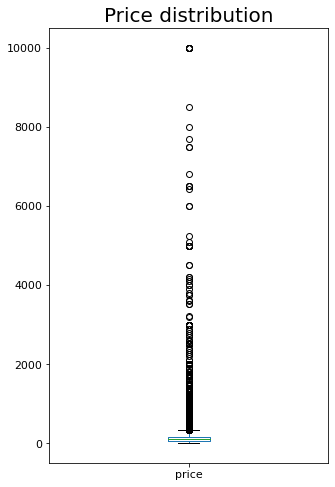

In [ ]:
# Let's check price column using box plot
plt.rcParams['figure.figsize']=(5,8)
df['price'].plot(kind='box')
plt.title('Price distribution',fontsize=20)


If we look at the box plot for price distribution, there seems to be many outliers. But we can't take so many outliers. Let's divide this price distribution for different-different Neighbourhood Groups.

Text(0.5, 1.0, 'Price distribution according to Neighbourhood groups')

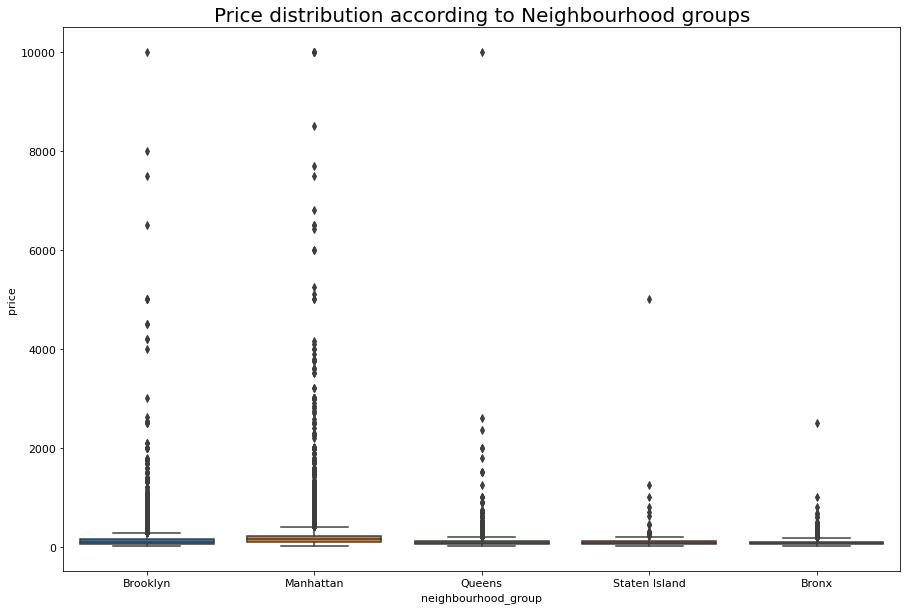

In [ ]:
plt.rcParams['figure.figsize']=(15,10)
sns.boxplot(x='neighbourhood_group',y='price',data=df)
plt.title('Price distribution according to Neighbourhood groups',fontsize=20)

If we look at above box plot. We can see that in each neighbourhood group there are outliers according to box plot. 

If we see Brooklyn and Manhattan, we can see that their price distributions are almost continuous till the highest price and there are many listings that have higher prices.

Also Brooklyn and Manhattan are expensive compartive to other three Boroughs. What is the reason behind it?

According to Real-estate data provider PropertyShark's report 2019, in the 10 most expensive NYC neighborhoods, 8 neighbourhoods are in Manhatten and 2 are in Brooklyn.(Article link: https://www.businessinsider.in/thelife/news/the-10-most-expensive-nyc-neighborhoods-to-live-in-right-now-ranked/articleshow/71651595.cms)

May be the reason of behind this is because of there is a brand value of these two boroughs or rich people are living there or beacuse demand is more.

If these boroughs are so expensive to live in, we can say that listings from these locations can have 10k dollars per night charge on Airbnb. Even many lisitngs have more than 6k dollars per night charge in these boroughs according to box plot

Let's talk about other boroughs

First look at Queens group. there is one lisitng have a price much more expensive compared to other listings. Let's look at neighbourhoods in the Queens group.

Text(0.5, 1.0, 'Price distribution for Queens neighbourhood group')

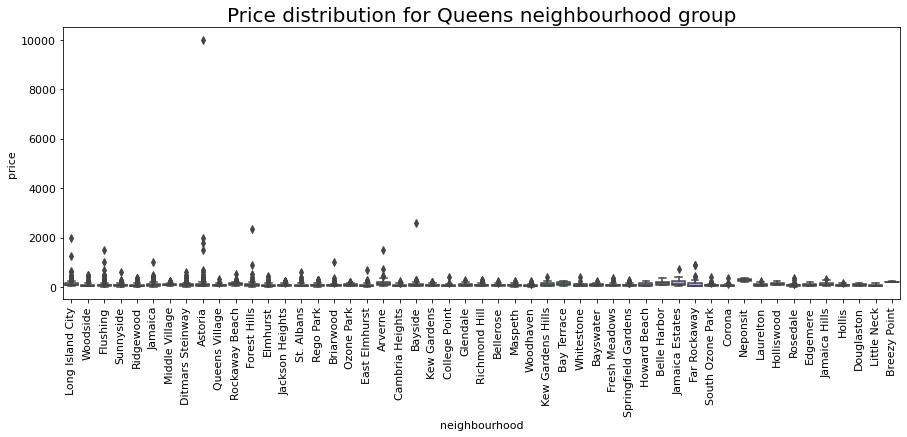

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(x='neighbourhood',y='price',data=df[df['neighbourhood_group']=='Queens'])
plt.xticks(rotation=90)
plt.title('Price distribution for Queens neighbourhood group',fontsize=20)

In this boxplot for Queens group, there is only one point far away from the range of other prices. This belongs to Astoria neighbourhood. Let's check Queen's stats:

In [ ]:
print(f"mean: {df[df['neighbourhood_group']=='Queens']['price'].mean()}")
print(f"median: {df[df['neighbourhood_group']=='Queens']['price'].median()}")

mean: 99.51764913519237
median: 75.0


So for Queens group, mean price is 99.51 dollars and median is 75 dollars. So we can remove that listing having 10k dollars price from Queens group.  

Text(0.5, 1.0, 'Price distribution for Staten Island neighbourhood group')

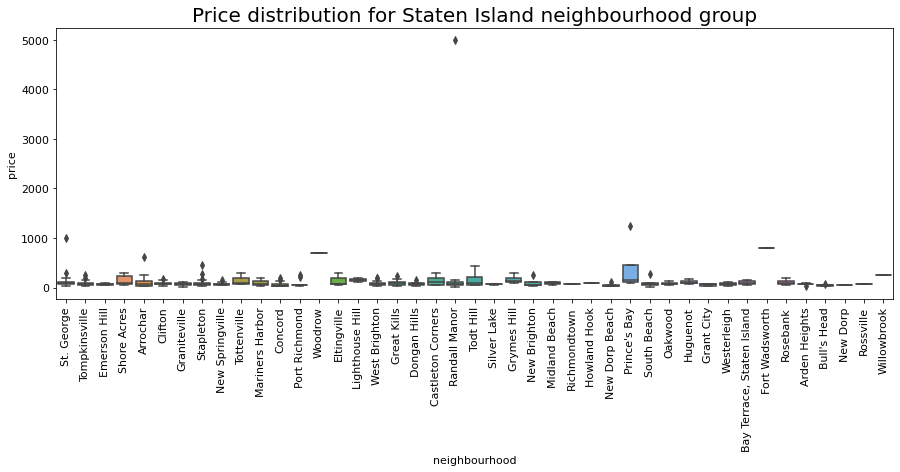

In [ ]:
sns.boxplot(x='neighbourhood',y='price',data=df[df['neighbourhood_group']=='Staten Island'])
plt.xticks(rotation=90)
plt.title('Price distribution for Staten Island neighbourhood group',fontsize=20)

Look at price distribution for Staten Island neighbourhood group in above box plot. There is one outlier at Randall Manor neighbourhood. This outlier is  also much expensive in comparision to other neighbourhoods in Staten Island. We can remove this observation.

Text(0.5, 1.0, 'Price distribution for Bronx neighbourhood group')

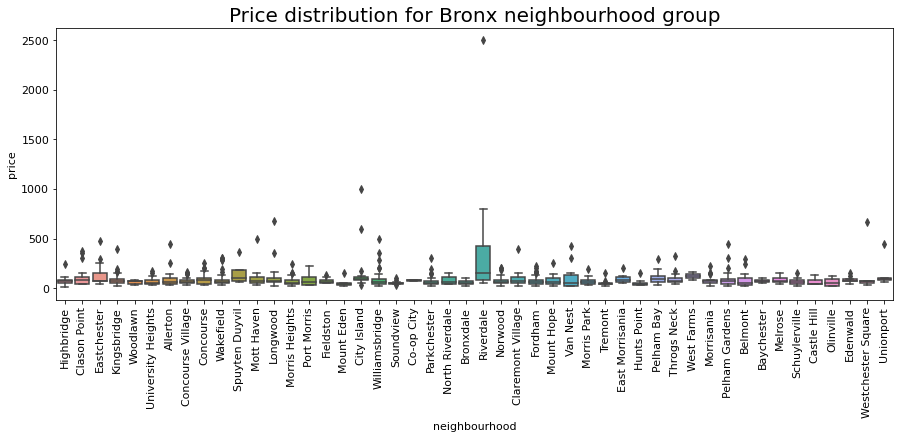

In [ ]:
sns.boxplot(x='neighbourhood',y='price',data=df[df['neighbourhood_group']=='Bronx'])
plt.xticks(rotation=90)
plt.title('Price distribution for Bronx neighbourhood group',fontsize=20)

Look at price distribution for Bronx neighbourhood group in above box plot. There is one outlier at Riverdale neighbourhood. This outlier is  also much expensive in comparision to other neighbourhoods in Bronx. We can remove this observation.

**Let's remove three outliers detected in recent observations.**

In [ ]:
# Find the label for outlier in Queens neighbourhood group
df[(df['price']>2000) & (df['neighbourhood_group']=='Queens')]


listing_id  ... last_review_year
9151      7003697  ...           2016.0
17811    13963005  ...              NaN
42680    33133321  ...           2019.0

[3 rows x 17 columns]

In [ ]:
# Find the label for outlier in Staten Island neighbourhood group
df[(df['price']>2000) & (df['neighbourhood_group']=='Staten Island')]

listing_id  ... last_review_year
22353    18051877  ...              NaN

[1 rows x 17 columns]

In [ ]:
# Find the label for outlier in Bronx neighbourhood group
df[(df['price']>2000) & (df['neighbourhood_group']=='Bronx')]

listing_id  ... last_review_year
24477    19698169  ...              NaN

[1 rows x 17 columns]

In [ ]:
# Now we can drop these outliers using drop method:
df.drop(labels=[9151,22353,24477], axis=0,inplace=True)

**We can treat Manhattan and Brooklyn differently in comparision to other 3 boroughs during creating predictive models. Considering that Manhattan and Brooklyn are much more expensive than other boroughs and have differnet price distribution.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48892 non-null  int64  
 1   listing_details                 48892 non-null  object 
 2   host_id                         48892 non-null  int64  
 3   host_name                       48892 non-null  object 
 4   neighbourhood_group             48892 non-null  object 
 5   neighbourhood                   48892 non-null  object 
 6   latitude                        48892 non-null  float64
 7   longitude                       48892 non-null  float64
 8   room_type                       48892 non-null  object 
 9   price                           48892 non-null  float64
 10  minimum_nights_stay             48892 non-null  int64  
 11  number_of_reviews               48892 non-null  int64  
 12  last_review_date                

### We can check price according to host also. Let's look at the listings for the host who have at least one listing in >7000 $ Range.

In [ ]:
# get the host_id's
df[df['price']>7000]['host_id']

4377       1177497
6530       1235070
12342      3906464
17692      5143901
29238     72390391
29662    156158778
30268     18128455
40433      4382127
42523      7407743
45666    262534951
Name: host_id, dtype: int64

In [ ]:
#get all the rows for host_ids mentioned above
df[(df['host_id']==1235070)|(df['host_id']==3906464)|(df['host_id']==5143901)|(df['host_id']==72390391)|(df['host_id']==18128455)|
           (df['host_id']==4382127)|(df['host_id']==1177497)|(df['host_id']==156158778)|(df['host_id']==7407743)|(df['host_id']==262534951)].sort_values('host_name')

listing_id  ... last_review_year
12342     9528920  ...           2016.0
17692    13894339  ...           2017.0
42523    33007610  ...              NaN
29238    22436899  ...              NaN
26589    21158775  ...           2019.0
10686     8217454  ...           2019.0
7797      5925343  ...           2019.0
597        225926  ...           2019.0
4377      2953058  ...           2016.0
4376      2952861  ...           2018.0
4310      2874932  ...           2019.0
3894      2400010  ...           2019.0
640        242532  ...           2019.0
637        241140  ...           2019.0
4387      2969427  ...           2018.0
40433    31340283  ...              NaN
6530      4737930  ...           2015.0
30268    23377410  ...           2018.0
42915    33330161  ...              NaN
42912    33326342  ...              NaN
42542    33029434  ...           2019.0
41216    32054910  ...              NaN
41215    32054475  ...              NaN
29661    22779542  ...              NaN
29666    22780220  ...              NaN
29665    22780158  ...              NaN
29664    22780103  ...              NaN
29663    22779746  ...              NaN
29662    22779726  ...              NaN
41214    32054416  ...              NaN
45554    34830282  ...           2019.0
45666    34895693  ...           2019.0

[32 rows x 17 columns]

If we look at the output above. Look at the hosts having more than one listing, so that we can compare prices of the listings for the same host.

There is one host 'Jessica' who has two expensive listings, prices for those listings are: 8000 and 4500. But these locations are film location and photography location (as mentioned in listing_details column). So we can justify their expensive prices according to their utilities.

Another host 'Sally' have uniform price for all of her lsitings.

Look at host 'Sandra'. There are two listings. Both have huge difernece in their prices despite being from same neighbourhood 'East Flatbush'. Even in listing_details we can't see any specific reason for this huge difference. We can remove one of the listings. If we check mean and median price for brooklyn, these are: 124 and 90 dollars. So for the better predictions let's remove listing having 7500 $ price per night.

In [ ]:
df[df['neighbourhood_group']=='Brooklyn'].describe()

listing_id       host_id  ...  booking_availability  last_review_year
count  2.010400e+04  2.010400e+04  ...          20104.000000      16447.000000
mean   1.825685e+07  5.671526e+07  ...            100.232292       2018.264364
std    1.083320e+07  7.260060e+07  ...            126.275775          1.193759
min    2.539000e+03  2.438000e+03  ...              0.000000       2011.000000
25%    8.704324e+06  5.611572e+06  ...              0.000000       2018.000000
50%    1.887604e+07  2.291993e+07  ...             28.000000       2019.000000
75%    2.784395e+07  7.910929e+07  ...            188.000000       2019.000000
max    3.648506e+07  2.743076e+08  ...            365.000000       2019.000000

[8 rows x 11 columns]

In [ ]:
# remove the row mentioned above:
df.drop(45666,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48891 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48891 non-null  int64  
 1   listing_details                 48891 non-null  object 
 2   host_id                         48891 non-null  int64  
 3   host_name                       48891 non-null  object 
 4   neighbourhood_group             48891 non-null  object 
 5   neighbourhood                   48891 non-null  object 
 6   latitude                        48891 non-null  float64
 7   longitude                       48891 non-null  float64
 8   room_type                       48891 non-null  object 
 9   price                           48891 non-null  float64
 10  minimum_nights_stay             48891 non-null  int64  
 11  number_of_reviews               48891 non-null  int64  
 12  last_review_date                

### **Plot a box plot according to room type, check for the outliers**

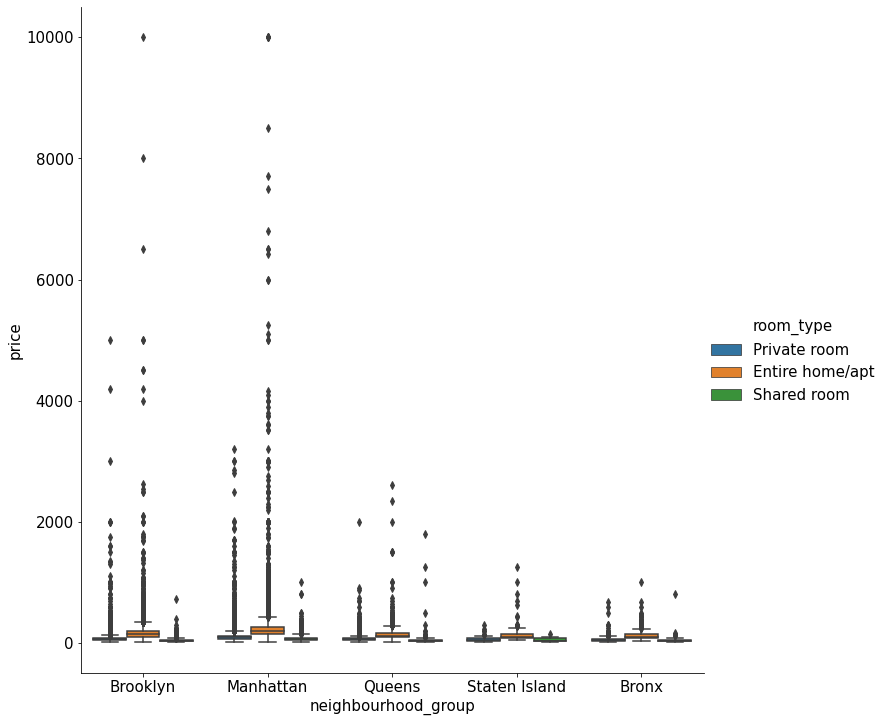

In [ ]:
plt.rcParams['figure.figsize']=(15,15)
plt.rcParams.update({'font.size': 15})
sns.catplot(x='neighbourhood_group',hue='room_type',y='price',size=10,kind="box",data=df)

We can see above that Entire home/apt are most expensive. Shared rooms are least expensive. If we look at Manhattan we can see 2 listings in private rooms segment which are most expensive, and comparing with most expensive entire homes/apts in Manhattan. Let's look the details od these properties.

In [ ]:
# See the details of most expensive private rooms in Manhatten
df[(df['neighbourhood_group']=='Manhattan')&(df['room_type']=='Private room')].sort_values('price',ascending=False).head()

listing_id  ... last_review_year
12342     9528920  ...           2016.0
37194    29547314  ...              NaN
28946    22296097  ...              NaN
946        363673  ...              NaN
39846    30962126  ...              NaN

[5 rows x 17 columns]

We can consider that room type is selected wrong as private room for these 2 most expensive properties in above output. See the second listing in the table, in the listing_details apartment is written. So this lsiting may be of Entire home/apt room type.

So we can change room types of these 2 listings.

In [ ]:
# change the room type
df.loc[[12342,37194],'room_type']=['Entire home/apt','Entire home/apt']

In [ ]:
df.loc[[12342,37194]]

listing_id  ... last_review_year
12342     9528920  ...           2016.0
37194    29547314  ...              NaN

[2 rows x 17 columns]

#### **Let's look at the Queens, Staten Island and Bronx box plots.** 




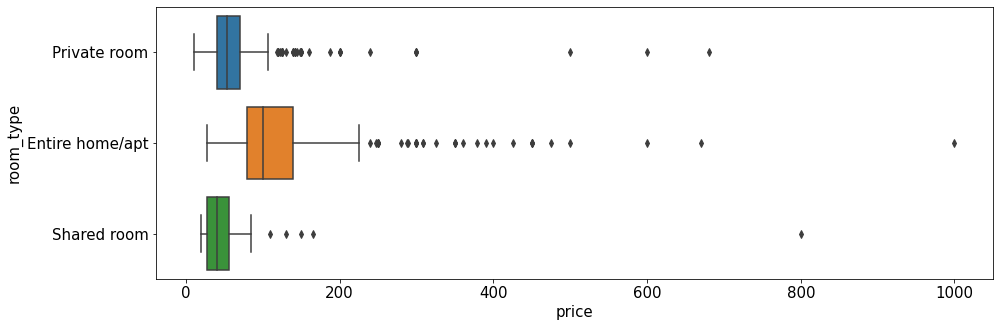

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(y='room_type',x='price',orient="h",data=df[df['neighbourhood_group']=='Bronx'])


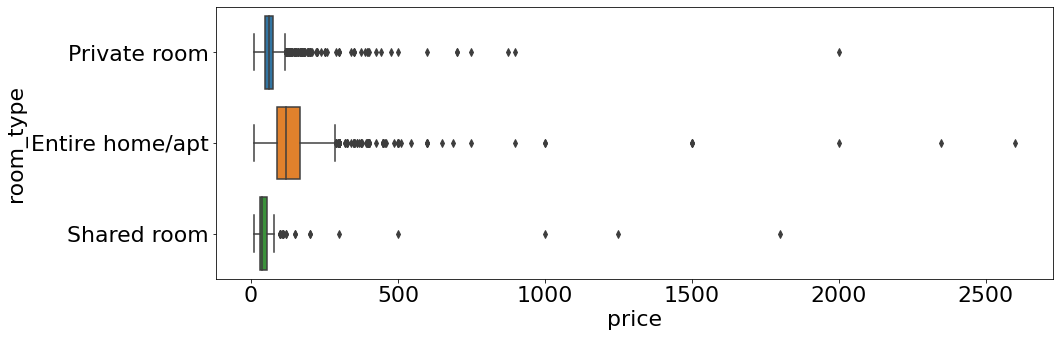

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(y='room_type',x='price',orient="h",data=df[df['neighbourhood_group']=='Queens'])


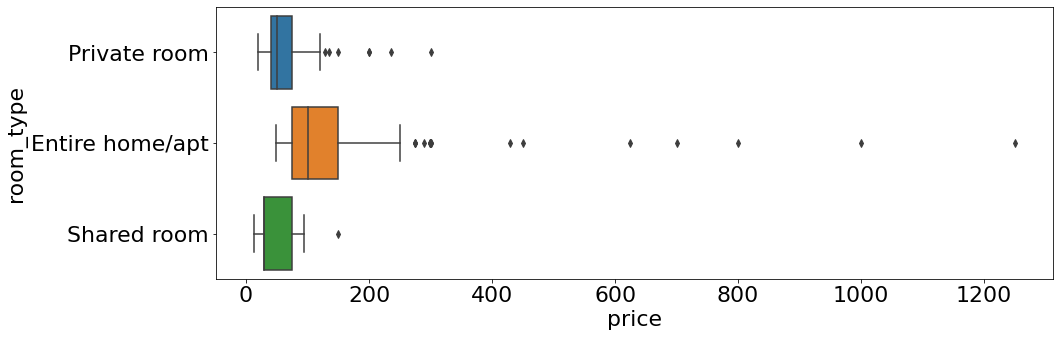

In [ ]:
plt.rcParams['figure.figsize']=(15,5)
sns.boxplot(y='room_type',x='price',orient="h",data=df[df['neighbourhood_group']=='Staten Island'])

In these box plots for 3 neighbourhood groups we can see that average price for entire home/apt is maximum and for shared room it is minimum. If we look at box plot for Bronx, there is one listing in shared room that is more expensive than the price of most expensive private room in Bronx. But the degree of difference in price is very less with compared to Manhattan and Brooklyn. Let's not modify any listing from Staten Island, Bronx and Queens.

### **We can check for outliers in price using scatter plot with some other columns** 

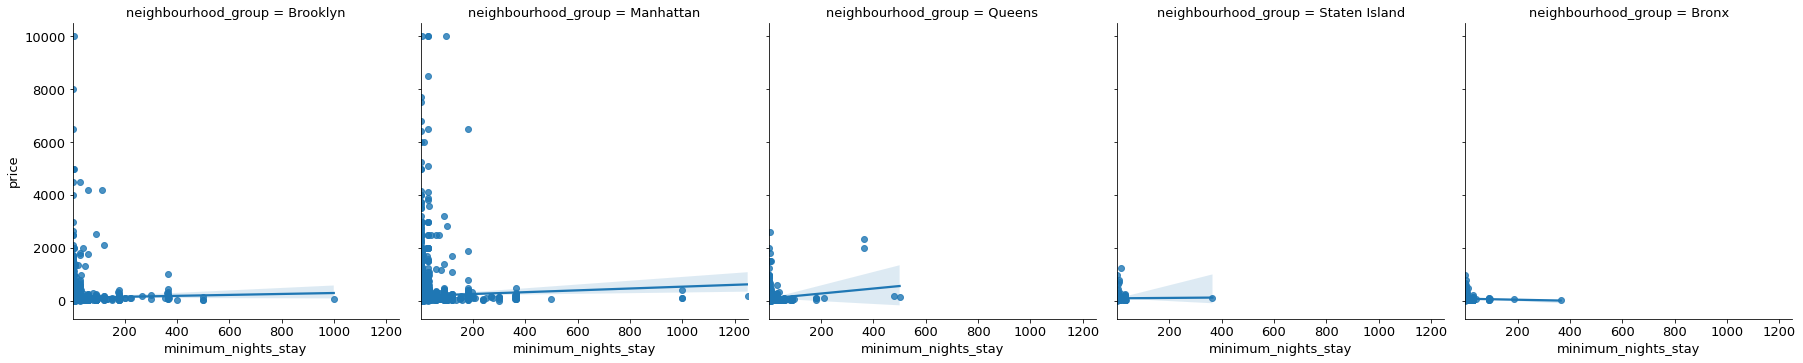

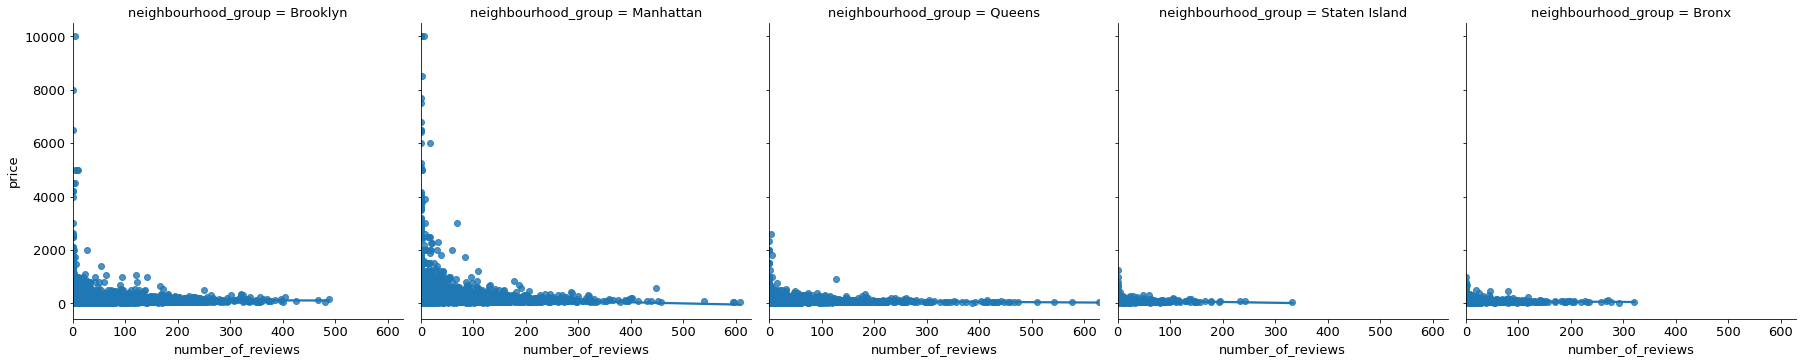

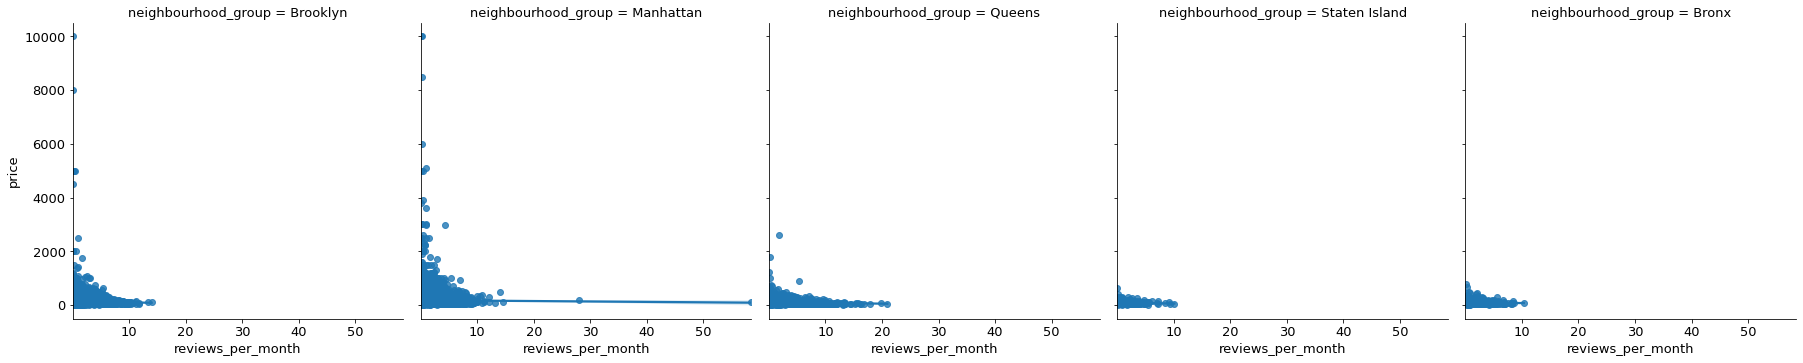

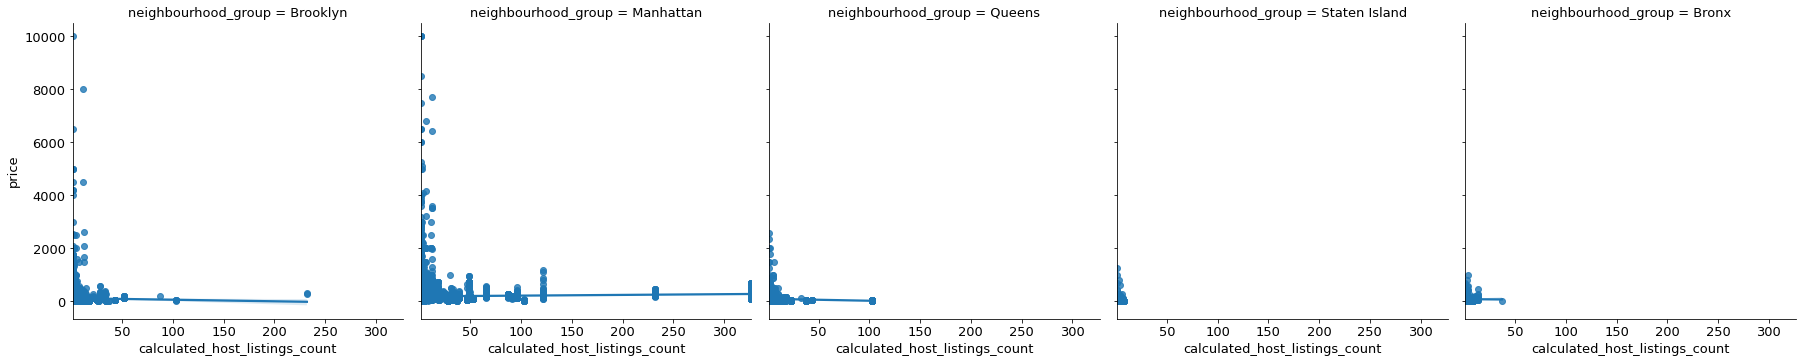

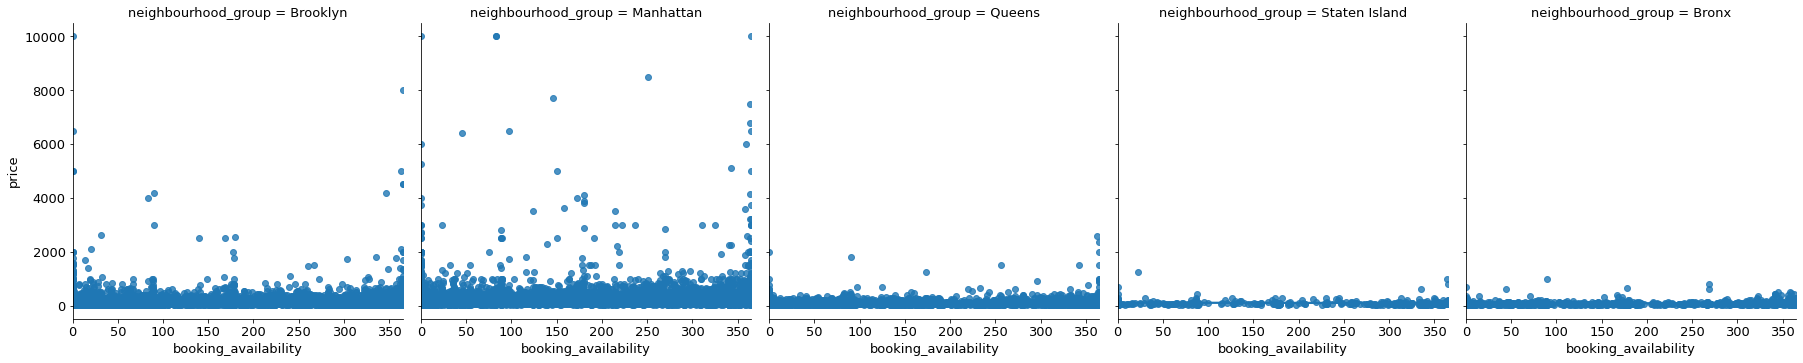

In [ ]:
plt.rcParams.update({'font.size': 13})
sns.lmplot(x = 'minimum_nights_stay', y = 'price',col='neighbourhood_group',data=df,fit_reg=True,)

sns.lmplot(x = 'number_of_reviews', y = 'price',col='neighbourhood_group',data=df,fit_reg=True)

sns.lmplot(x = 'reviews_per_month', y = 'price',col='neighbourhood_group',data=df,fit_reg=True)

sns.lmplot(x = 'calculated_host_listings_count', y = 'price',col='neighbourhood_group',data=df,fit_reg=True)

sns.lmplot(x = 'booking_availability', y = 'price',col='neighbourhood_group',data=df,fit_reg=True)

plt.show()

If we look at these scatter plots, we can reach to these conclusions:

look at price and minimum nights for stay scatter plots,It looks like if number of nights are increasing, price is decreasing. But this relationship is not strong here. We can't see any outliers clearly.

We can see similar scenerios with other scatter plots of number of reviews, reviews per month, host listing counts with price. 

Look at booking availability vs price scatter plots. There is no relationship.

Here we could not detect any outlier.

Let's move on with other variables.

### **Let's check minimum nights stay variable**

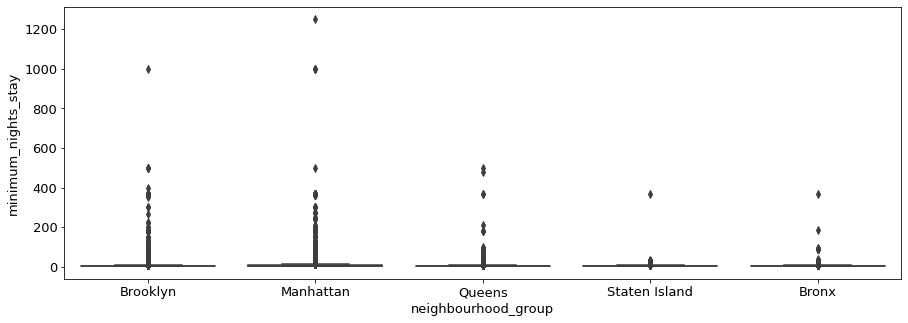

In [ ]:
sns.boxplot(y='minimum_nights_stay',x='neighbourhood_group',data=df,)

**If we look at the box plot for minimum nights stays according to neighbourhood groups. There are some unusual data points, where minimum nights stays are more around 1000 days. Let's check those observatons where nights are >365.**

In [ ]:
df[df['minimum_nights_stay']>365]

listing_id  ... last_review_year
1305       568684  ...           2018.0
2854      1615764  ...              NaN
5767      4204302  ...           2014.0
7355      5431845  ...           2018.0
8014      6169897  ...              NaN
10829     8341919  ...              NaN
11193     8668115  ...           2016.0
13404    10053943  ...           2018.0
14285    11096888  ...              NaN
15946    12888849  ...              NaN
26341    20990053  ...           2018.0
34487    27362309  ...              NaN
38664    30378211  ...              NaN
47620    35834935  ...              NaN

[14 rows x 17 columns]

look at the above output. There is one host who have 6 listings. Let's check that individual host.

In [ ]:
df[df['host_id']==151084261]

listing_id  ... last_review_year
26341    20990053  ...           2018.0
26343    20990607  ...           2018.0
26344    20990770  ...           2019.0
26387    21013416  ...           2019.0
30730    23772767  ...           2019.0
32195    25182363  ...           2018.0

[6 rows x 17 columns]

If we look at the host Angie, we can see there is one listing that have unusual night stays of 999 compared to other properties despite of having similar details. so we can change this data with 30 minimum nights stay. 

In [ ]:
# change the data, mentioned above:
df.loc[26341,'minimum_nights_stay']=30

Looking at the observations having minimum nights stay of > 365, it has 14 rows. In these observations we have minimum nights stay of 999, 500, or 400 nights. That seems to be unusual, and way more than the mean and median of the same variable. 

**We can consider minimum nights stay of 365 nights for these observations.** 

Let's change the data for the column where minimum nights stay of > 365 nights.

In [ ]:
def convert_to_365(nights):
  ''' function to change the value to 365 if it's >365'''
  if nights>365:
    return 365
  else:
    return nights

In [ ]:
df['minimum_nights_stay']=df['minimum_nights_stay'].apply(convert_to_365)

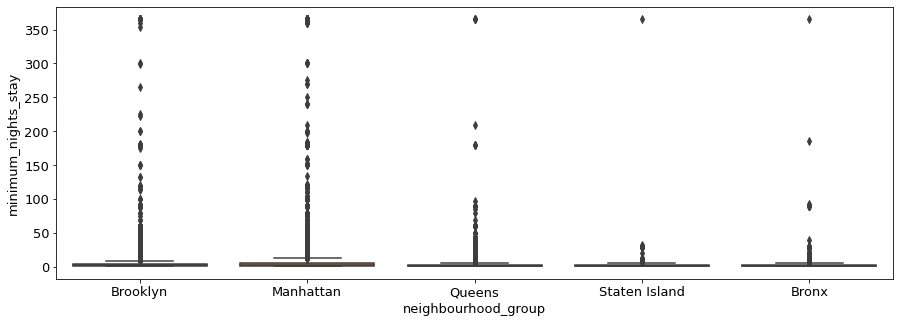

In [ ]:
# after conversion, plot the box plot
sns.boxplot(y='minimum_nights_stay',x='neighbourhood_group',data=df)

# **Creating new features and further analysis**

##Creating categorical feature for price

We can create a new feature for price, giving some labels according to price range.
Most listings are in price range of 0 to 400 dollars.  

**so we can give a label to this range: affordable**  
**400 to 1000 dollars: expensive**   
**price >1000 dollars: most expensive** 

In [ ]:
df['price_range']=df['price']
df['price_range']=pd.cut(df['price_range'], bins=[0, 400,1000, 10000], include_lowest=True, labels=['affordable', 'expensive','most expensive'])
df.head()

listing_id  ... price_range
0        2539  ...  affordable
1        2595  ...  affordable
2        3647  ...  affordable
3        3831  ...  affordable
4        5022  ...  affordable

[5 rows x 18 columns]

In [107]:
# Number of listings in each category
df['price_range'].value_counts()

affordable        47132
expensive          1524
most expensive      235
Name: price_range, dtype: int64

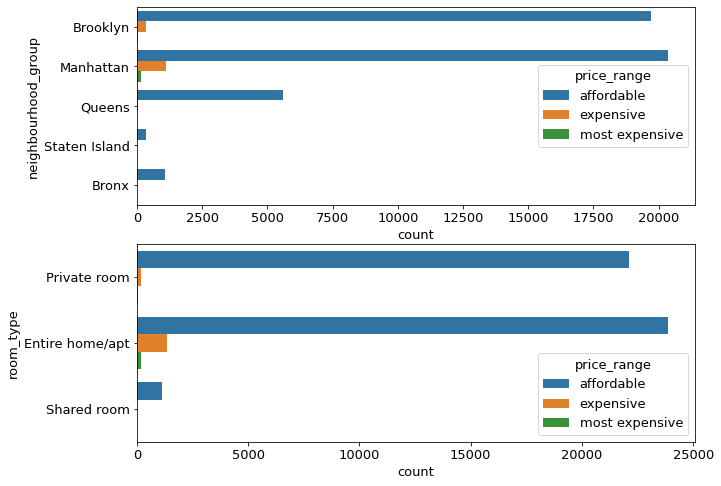

In [108]:
plt.rcParams['figure.figsize']=(10,8)
plt.subplot(2,1,1)
sns.countplot(data=df,hue='price_range',y='neighbourhood_group')
plt.subplot(2,1,2)
sns.countplot(data=df,hue='price_range',y='room_type')

**From above barplot we can say that Queens, Staten Island and Bronx are affordable with comparision to Manhattan and Brooklyn. Shared rooms are the most affordable room type.**

There are 47132 affordable listings, 1524 expensive and 235 most expensive listings.



## Creating numeric features for room type

We can create dummy variables for room type.

This will help us in using this feature while creating Machine Learning models. And the numeric values help to see if there is any correlation.

In [109]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [110]:
# create dummy variables for room type
room_dummies=pd.get_dummies(df['room_type'])

In [111]:
# merge dummy variables dataframe with original dataframe
df=pd.merge(df,room_dummies,left_index=True,right_index=True)


In [112]:
df.head()

listing_id  ... Shared room
0        2539  ...           0
1        2595  ...           0
2        3647  ...           0
3        3831  ...           0
4        5022  ...           0

[5 rows x 21 columns]

## Creating categorical feature for availability

In [113]:
df['booking_availability'].unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

In [114]:
print('Minimum value = ', df['booking_availability'].min())
print('Maximum value = ', df['booking_availability'].max())

Minimum value =  0
Maximum value =  365


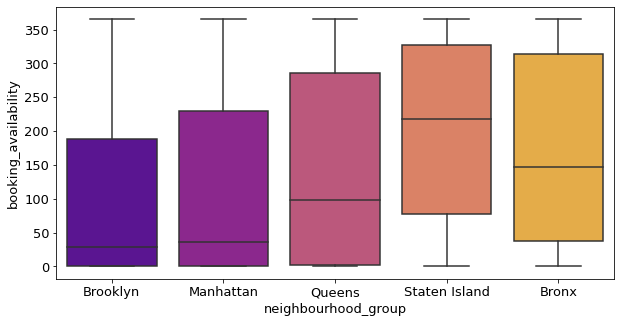

In [115]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='booking_availability',palette='plasma')

We can see that Staten Island has the maximum availability and Brooklyn has the least availabilty comparatively.

**Let's create distribution plot for availability only if availability > 0.**

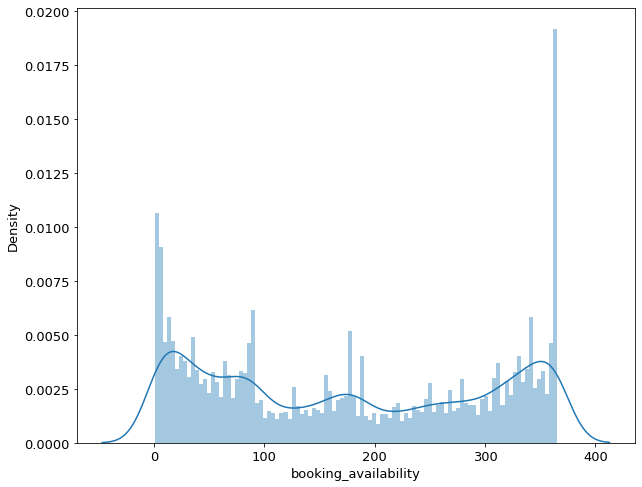

In [116]:
sns.distplot(df[df['booking_availability']>0]['booking_availability'],bins=100)

Now to create a new feature for booking availability we have to divide availability in proper categories. In above graph density is more for availability<100. and same is with availability >300.
**So we can create four bins:**  
**availability 0 days: not available**   
**availability 0<days<= 90: low availability**  
**availability 90<days<=270: average availability**  
**availability days>270: high availability**

In [117]:
# Write a function to categorize booking availability variable
def modified_response1(row):
  ''' To categorize booking availability variable'''
  if (row['booking_availability'] ==0):
    val = 'not available'
  elif (row['booking_availability'] <=90):
    val = 'low availability'
  elif (row['booking_availability'] <=270):
    val = 'average availability'
  else:
    val = 'high availability'
  
  return val

In [118]:
# add a new column for categorized booking availability variable
df['availbility_cat'] = df.apply(modified_response1,axis = 1)

In [119]:
df.head()

listing_id  ...       availbility_cat
0        2539  ...     high availability
1        2595  ...     high availability
2        3647  ...     high availability
3        3831  ...  average availability
4        5022  ...         not available

[5 rows x 22 columns]

In [120]:
df['availbility_cat'].value_counts()

not available           17532
low availability        11713
high availability        9850
average availability     9796
Name: availbility_cat, dtype: int64

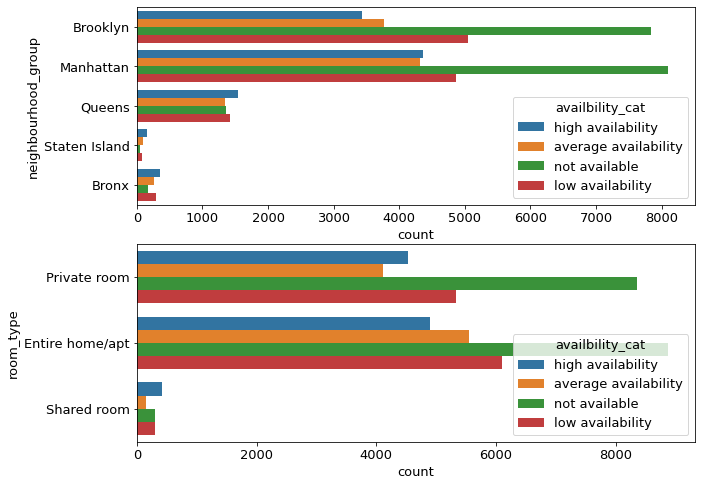

In [121]:
plt.rcParams['figure.figsize']=(10,8)
plt.subplot(2,1,1)
sns.countplot(data=df,hue='availbility_cat',y='neighbourhood_group')
plt.subplot(2,1,2)
sns.countplot(data=df,hue='availbility_cat',y='room_type')

So, as we can see 17532 hotels are not available, 11713 hotels are less 
available, 9796 are averagely available and 9850 hotels are highly available.

**Look at the first bar chart, in Manhattan and Brooklyn, high green bar shows that number of the properties, that are not available, is very high.**

**Same case can be seen in second bar chart for private rooms and entire homes.** 

##Data visulization and analysis after data cleaning and feature engineering

### Count of listings in each neighbourhood 

Text(0.5, 1.0, 'Neighbourhood')

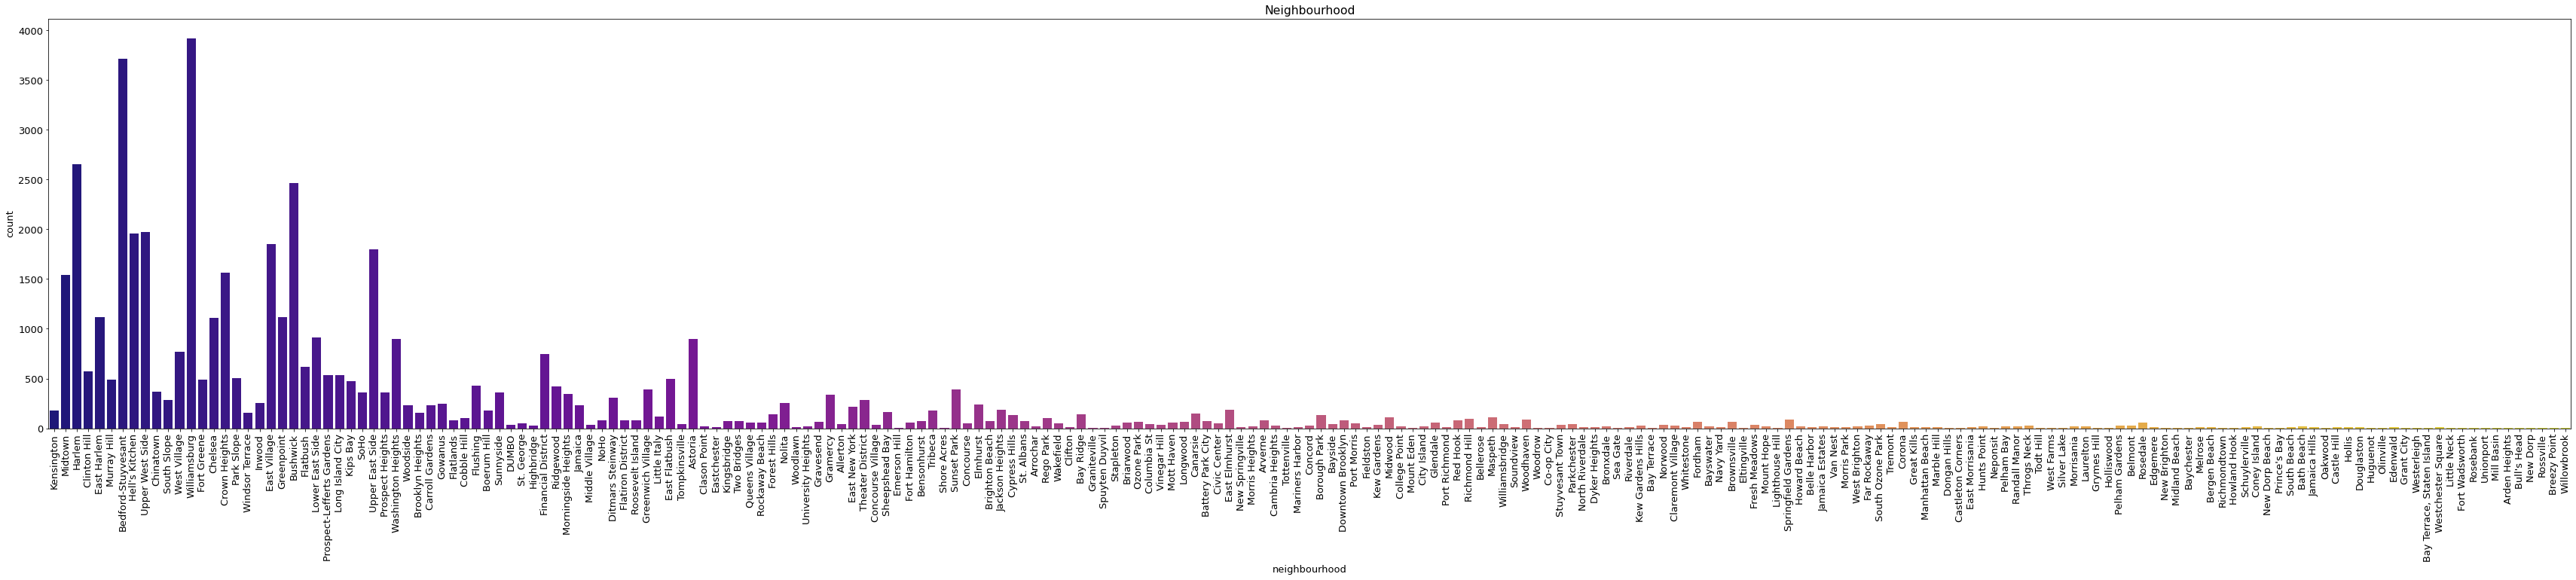

In [122]:
sns.countplot(df['neighbourhood'], palette="plasma",)
fig = plt.gcf()
fig.set_size_inches(60,10)
plt.xticks(rotation=90)
plt.title('Neighbourhood')

**Williamsburg neighbourhood has the maximum no. of listings.**

### Listing's density in each neighbourhood group on a map

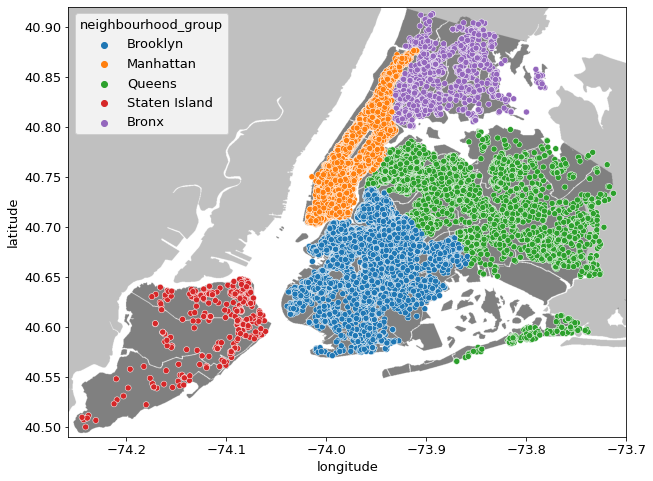

In [123]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

From this map we get a clear geographic view of the different neighbourhood groups with their listing density.

**We can see there are few listings in Staten Island.**

### Map showing listing's availability in each neighbourhood group 

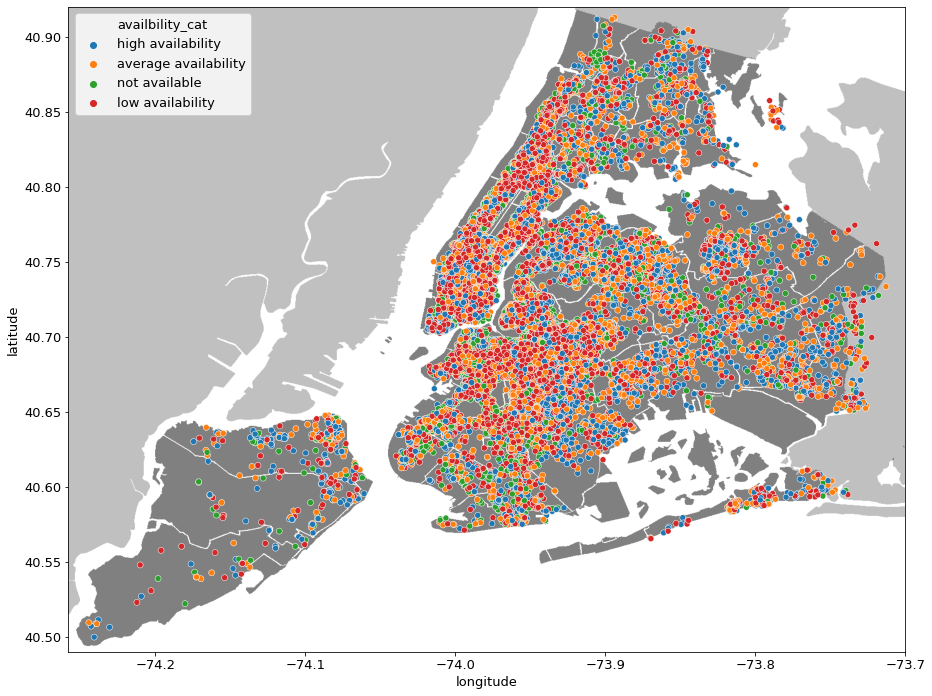

In [124]:
plt.figure(figsize=(15,15))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sns.scatterplot(df.longitude,df.latitude,hue=df.availbility_cat)
plt.ioff()

### Map showing affordibility for each neighbourhood

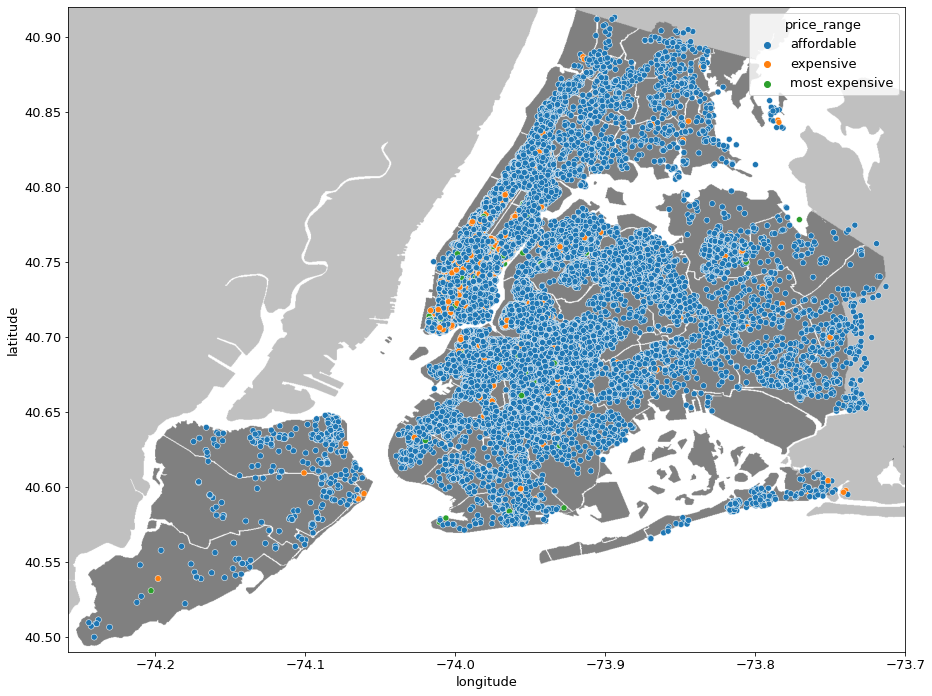

In [125]:
plt.figure(figsize=(15,15))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sns.scatterplot(df.longitude,df.latitude,hue=df.price_range)
plt.ioff()

We can observe that there are many yellow points in Manhattan. That means there are many expensive lisitngs in Manhattan. This again proves expensiveness of Manhattan.

Fantastic! After scaling our image the best we can, we observe that we end up with very immersive scatterplots. Using latitude and longitude points, we are able to visualize all NYC listings.  However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis

# **Get correlation between different variables using Heatmap**

Index(['listing_id', 'listing_details', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights_stay', 'number_of_reviews',
       'last_review_date', 'reviews_per_month',
       'calculated_host_listings_count', 'booking_availability',
       'last_review_year', 'price_range', 'Entire home/apt', 'Private room',
       'Shared room', 'availbility_cat'],
      dtype='object')

<Figure size 1224x720 with 0 Axes>

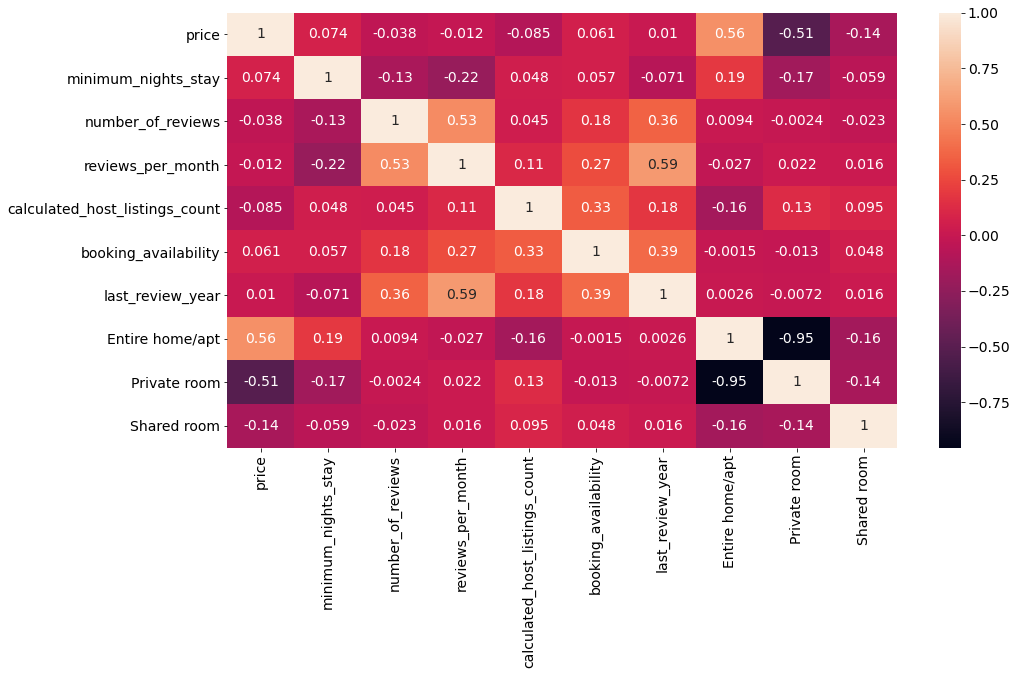

In [126]:
fig = plt.figure(figsize = (17,10))
plt.rcParams.update({'font.size': 14})
corr = df.drop(['listing_id','host_id','latitude','longitude'],axis=1).corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

Observe the heatmap. **Last review year and reviews per month have a better positive correlation**. Although correlation is not that much strong. 

Let's understand this. If last review year for a listing is a latest year(let's say 2019). That means it is reviewed many times as it had more time for bookings since starting, that can lead to more reviews. This will result more reviews per month. If a listing is reviewed last in 2017, that means less bookings, less reviews but months will be calculated till 2019. This will result in less reviews per month. So we can say last review year and reviews per month are positively correlated.

But there can be other factors also that make this relationship less strong. For example, what if a lisitng is available during a season in a year and other listings are available for whole year?  
what if a listing was not available in a particular year?  
Different listings were listed on Airbnb in different years. 

Private room and Entire home are negatively correlated. That's obvious, because if it is not private room then it'll be Entire home and vice-versa, most probably, as shared rooms are very less in number. 

# **Conclusions:**

1. Top 5 neighbourhoods in terms of number of listings:  
Williamsburg(Brooklyn):          3920  
Bedford-Stuyvesant(Brooklyn):    3714  
Harlem(Manhattan):               2658  
Bushwick(Brooklyn):              2465  
Upper West Side(Manhattan):      1971

2. Manhattan and Brooklyn are most expensive boroughs compared to other 3 boroughs.  
Manhattan(around 44%) and brooklyn(around 41%) are places which have maximum Airbnb properties as well. 
Why it's so?   
If we talk about Manhattan, Manhattan is the cultural, administrative, and financial center of New York City and contains the headquarters of many major multinational corporations, the United Nations Headquarters, 
Wall Street, and a number of important universities(from wikipedia). It's also a status symbol living in Manhattan and many rich people live there. 
People would like to go there to explore the city. People would often come there for their official works and stay there. These might be the resaons for most number of listings and expensiveness. 
Staten Island(2.23%) and Bronx(0.76%) have least number of listings.

3. Most of the listings(around 96%) have been priced under 400 dollars.

4. Price of 3.6% properties are so high.This can be a good suggestion that Airbnb should do a evaluation of these properties and tell the properties host that they should try to decrease their price for the properties, as users are bacially prefering average price properties so if they decrease the properties price chances of booking will increase which leads to more generation of more revenue.

5. Entire home/apt are most expensive type of rooms and shared rooms are the cheapest. Entire home/apt type is at the first place in terms of numbers(52%) following private room type(45.66%).  
Shared rooms are very less(2.37%). May be people are concerned about privacy. They don't prefer shared rooms. So in result hosts don't mention shared listings on Airbnb. Other reason may be less revenue from shared rooms. 


6. If we talk about private and entire home, entire houses are more in comparision to private rooms in Manhattan and Brooklyn but in
Queens, Bronx, Staten Island situation is opposite. May be in Manhattan and Brooklyn, more people come with their families. So they need entire house/apt.


7. There are 17533 rows that have zero values for booking_availability column. Total number of observations are 48895. Almost 36% listings have 0 days of availability for bookings. Values of this variable can be updated or this variable should be defined correctly for an authentic data collection.

8. There is no strong correlation between numeric variables, when we look at the heatmap. To create a better machine learning model to predict price we might need other informations. For example: per capita income, locations of airports,stations, number of rooms, type of furnishing etc.

9. Sonder (NYC), Blueground, Kara and Kazuya have more than 100 listings.
We can say that 8 out of 10 hosts that are having most number of properties, have almost all the properties in Manhattan. It is so because out of five boroughs of the New York City manhattan is the most popular borough and there are other reasons mentioned earlier.

10. Sonder(NYC), Row(NYC), Lakshmee, Danielle and David are the top 5 busiest hosts.  
In the top ten busiest hosts, most of the hosts have their properties in Manhattan and Queens.

11. Only 72 porpeties are having monthly reviews greater than 10. This will help Airbnb to reach out these 72 host and to ask them what all things they have in thier properties or what extra initiative they have taken to attract more customers. Airbnb can use these inputs in helping other hosts who are not having good number of bookings. This can help to get more reviews as bookings increase. Airbnb should also take extra intiative so that every user who books the properties on Airbnb should give reviews.
